# Estrategias para preparación de datos y enfoques de problemas

### 0. Instalación e importación de librerías 

In [1]:
# Manejo de datos/dataframes
!pip install pandas

# Jupyter 
!pip install ipywidgets

# Cálculo, Estadística, ML...
!pip install scipy
!pip install scikit-learn

# Visualizacion
!pip install matplotlib
!pip install seaborn
!pip install plotly==5.18.0
#* Requisito para ploty
!pip install nbformat>=4.2.0

# Automated EDA
!pip install ydata-profiling
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from scipy import stats

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


# Solamente para evitar warnings de la libreria seaborn
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
# Semilla para obtener mismos resultados en métodos/funciones que utilicen selecciones aleatorias: "random_seed" o similar.
SEED = 1234

## 1. Carga de datos
- Para poder comenzar la preparación de datos necesitamos cargarlos.
- **Importance explorar los datos antes si es posible** (Desde Excel, bloc de notas, etc.).
- Saber detalles previos como su formato, como se separan los datos, etc. facilitaran su carga.
- Si el conjunto total de datos no es posible cargarlo en memoria, realizar la exploración inicial con una muestra representativa.
- **Mas detalles en el fastbook.**
- Tipos comunes de datos:
  - .csv:  comma separated values: .read_csv()
  - .json: JavaScript Object Notation (dictionary like): .read_json()
  - .parquet: formato tabular de Apache:  .read_parquet()
etc.

  - [guia extensa de lectura de cualquier tipo de archivo](https://realpython.com/pandas-read-write-files/)

In [4]:
df = pd.read_csv('penguins_size.csv')

In [5]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = F

 ## 2. Previsualización de los datos o Data previsualization
- Para tener una vista y comprensión rápida de los datos a tratar: tipo, tamaño, numero de campos, etc.
    - .shape
    - .head()
    - .tail()
    - .sample()
    - .dtypes


In [6]:
df.shape

(344, 7)

In [7]:
len(df)

344

In [8]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [9]:
df.tail()

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe               NaN              NaN                NaN   
340  Gentoo  Biscoe              46.8             14.3              215.0   
341  Gentoo  Biscoe              50.4             15.7              222.0   
342  Gentoo  Biscoe              45.2             14.8              212.0   
343  Gentoo  Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE

In [10]:
df.sample(n=5, random_state=SEED)

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
64   Adelie  Biscoe              36.4             17.1              184.0   
237  Gentoo  Biscoe              49.2             15.2              221.0   
115  Adelie  Biscoe              42.7             18.3              196.0   
97   Adelie   Dream              40.3             18.5              196.0   
37   Adelie   Dream              42.2             18.5              180.0   

     body_mass_g     sex  
64        2850.0  FEMALE  
237       6300.0    MALE  
115       4075.0    MALE  
97        4350.0    MALE  
37        3550.0  FEMALE

In [11]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [12]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 74.0 KB


In [13]:
df.memory_usage(deep=True).sum() / 1000

75.737

In [14]:
df.memory_usage(deep=True).sum()  / (1024 * 1024)

0.07222843170166016

In [15]:
# variable guardada para más adelante
species_name = df["species"].unique().tolist()

- Datos numéricos y categóricos.
- Bajo número de campos (7).
- Bajo número de filas (344).

### Analisis exploratorio de los datos
- Conocer más en detalle los datos: métricas estadísticas, frecuencia, distribución, etc.
  - .describe()

In [16]:
df.describe(include=np.number).T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

- length and body mass have different data ranges

In [17]:
df.describe(include='O').T

count unique     top freq
species   344      3  Adelie  152
island    344      3  Biscoe  168
sex       334      3    MALE  168

- body_mass_g posee un rango de valores muy distinto al de los otros campos numéricos (g y los otros campos son mm): necesidad de escalado.
- `sex` tiene tres valores unicos? no deberían ser dos: MALE, FEMALE?

#### Visualizacion
- Conocer la distribución de los datos, relaciones lineales o no lineales, etc.
  - .plot(): kind='bar'/'line'/'scatter'/...
  - .hist(), etc.
  - Matplotlib
  - Seaborn

''

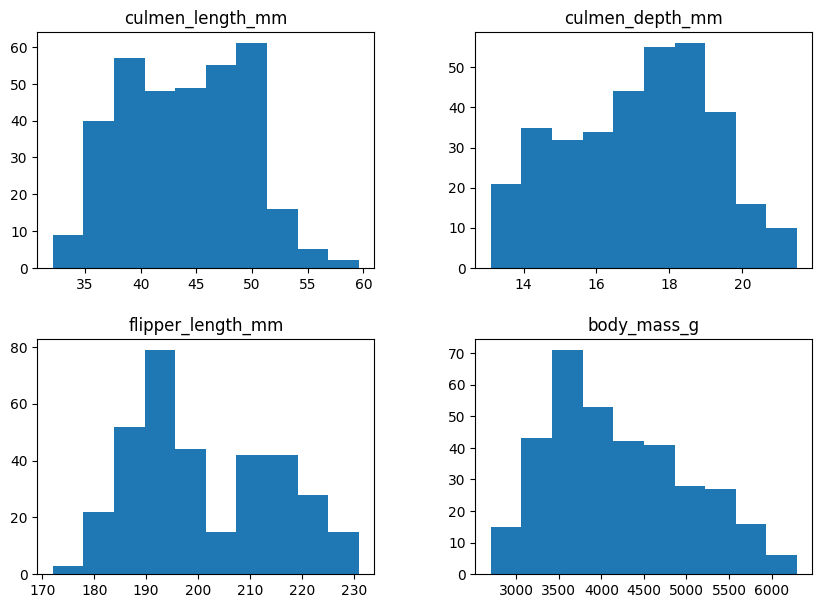

In [18]:
df.hist(layout=(4, 2), figsize=(10, 15),  grid=False)
;

- Diferentes tipos de distribución: normal, sesgada/skewed, bimodal?

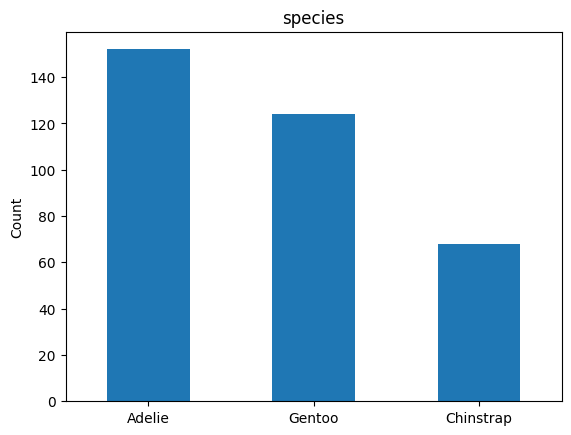

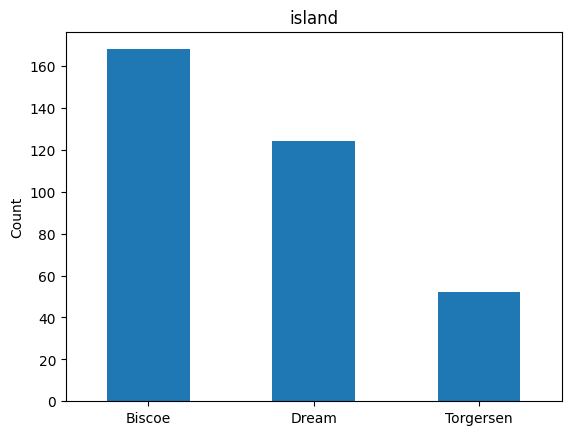

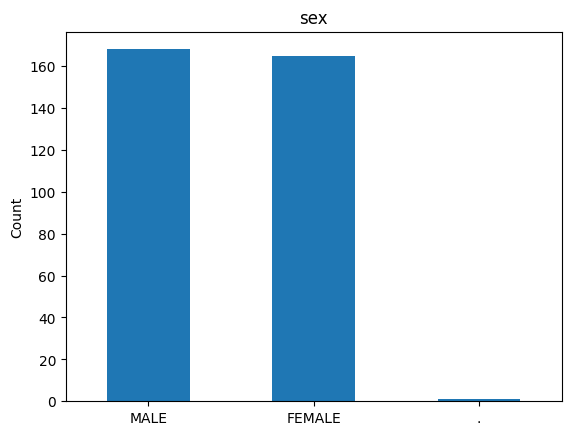

In [19]:
for cat_col in df.select_dtypes(include='O').columns.tolist():
    df[cat_col].value_counts().plot(kind='bar', rot=0).set_title(cat_col)
    plt.ylabel('Count')
    plt.show()

- categorias desbalanceadas.
- Error en categoría 'sex': presencia de categoría '.': necesita limpieza. 

#### Recursos para EDA (Exploración de datos analítica)

[Matplotlib Cheatseets](https://matplotlib.org/cheatsheets/)

[Pandas Cheatseets](https://dfedorov.spb.ru/pandas/cheatsheet/Enthought-v1.0.2.pdf)

<img src="https://imgv2-1-f.scribdassets.com/img/document/383895387/original/f03d59526b/1699542817?v=1" width="600">


<img src="https://matplotlib.org/cheatsheets/_images/handout-beginner.png" width="800">



<img src="https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png" width="1300">

#### Exploradores de datos automatizados
- ydata_profiling
- sweetviz
- etc.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

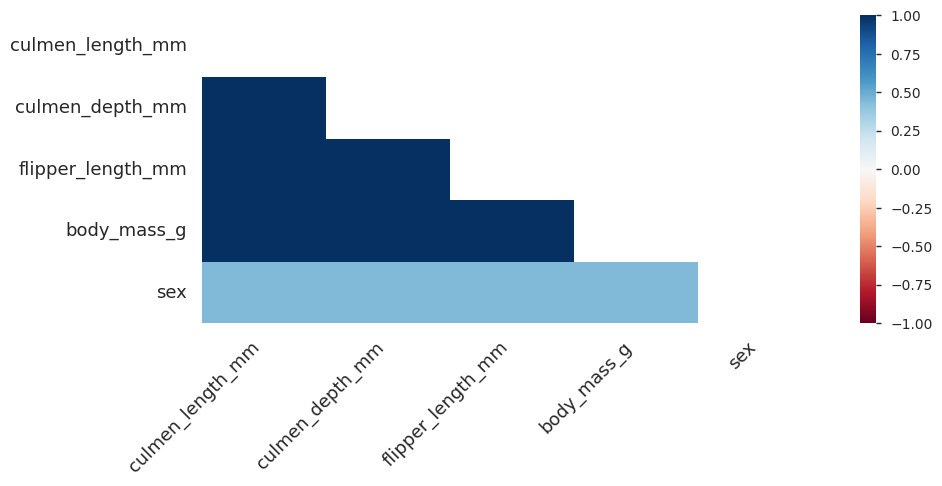

In [20]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA")
profile

In [21]:
import sweetviz as sv

analyze_report = sv.analyze(df)
analyze_report.show_html('report.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

## 3. Data Profiling & Data Cleaning
- Perfilado de datos o Data Profiling: búsqueda de errores, inconsistencias, etc. dentro del conjunto de datos.
- Limpieza de datos o Data Cleaning: corrección/limpieza del conjunto de datos.

### 3.1. Valors faltantes o *Missing data*

- Los valores faltantes o *missing data* son aquellos valores que se encuentran ausentes dentro de su respectiva fila/entrada de datos y columna/variable/feature en un dataset. 
- Nomenclatura típica de datos faltantes: None, NaN, NAN, <NaN>, <NAN>, NaT, '', ' ' 
  - .isna()
  
*NAN: Not a Number*

In [23]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [24]:
# isna() devuelve la comprobación de si un dato es faltante (NaN) o no con "True" o "False"
df.isna().head()

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    False   False             False            False              False   
1    False   False             False            False              False   
2    False   False             False            False              False   
3    False   False              True             True               True   
4    False   False             False            False              False   

   body_mass_g    sex  
0        False  False  
1        False  False  
2        False  False  
3         True   True  
4        False  False

In [25]:
df[df.isna()].head()

species island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0     NaN    NaN               NaN              NaN                NaN   
1     NaN    NaN               NaN              NaN                NaN   
2     NaN    NaN               NaN              NaN                NaN   
3     NaN    NaN               NaN              NaN                NaN   
4     NaN    NaN               NaN              NaN                NaN   

   body_mass_g  sex  
0          NaN  NaN  
1          NaN  NaN  
2          NaN  NaN  
3          NaN  NaN  
4          NaN  NaN

In [26]:
print('NaN value: ', df[df.isna()].species.values[0])
print('type', type(df[df.isna()].species.values[0]))

NaN value:  nan
type <class 'float'>


#### 3.1.1. Información de valores faltantes
- isna().sum()

In [27]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [28]:
df.isna().sum().sum()

18

In [29]:
round(df.isna().mean() * 100, 2)

species              0.00
island               0.00
culmen_length_mm     0.58
culmen_depth_mm      0.58
flipper_length_mm    0.58
body_mass_g          0.58
sex                  2.91
dtype: float64

#### 3.1.2. Opcion 1: Eliminar filas que contienen datos faltantes
- dropna()

In [30]:
df[df['sex'].isna()].head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3   Adelie  Torgersen               NaN              NaN                NaN   
8   Adelie  Torgersen              34.1             18.1              193.0   
9   Adelie  Torgersen              42.0             20.2              190.0   
10  Adelie  Torgersen              37.8             17.1              186.0   
11  Adelie  Torgersen              37.8             17.3              180.0   

    body_mass_g  sex  
3           NaN  NaN  
8        3475.0  NaN  
9        4250.0  NaN  
10       3300.0  NaN  
11       3700.0  NaN

In [31]:
# dropna(): elimina filas con datos faltantes
df.dropna(axis=0).isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [32]:
df.dropna(axis=0)[df['sex'].isna()].head()

/tmp/ipykernel_16567/3685977962.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.dropna(axis=0)[df['sex'].isna()].head()


Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []

#### 3.1.2. Opcion 2: Imputar valores faltantes
- Imputacion: consiste en el reemplazo de datos faltantes por otros. 
- Se suelen utilizar diferentes estrategias: cero, media, mediana, iterativa etc.
  - .fillna()

In [33]:
# select_dtypes: seleccionar solo los campos deseados
df.select_dtypes(include=np.number).fillna(df.select_dtypes(include=np.number).mean()).isna().sum()
# example with one column: df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [34]:
df.select_dtypes(include=np.number)[df['sex'].isna()].head(2)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
3               NaN              NaN                NaN          NaN
8              34.1             18.1              193.0       3475.0

In [35]:
df.select_dtypes(include=np.number).fillna(df.select_dtypes(include=np.number).median())[df['sex'].isna()].head(2)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
3             44.45             17.3              197.0       4050.0
8             34.10             18.1              193.0       3475.0

In [36]:
df.select_dtypes(include=np.number).fillna(0)[df['sex'].isna()].head(2)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
3               0.0              0.0                0.0          0.0
8              34.1             18.1              193.0       3475.0

#### Solución final elegida: eliminar todos los datos faltantes

In [37]:
# inplace: aplicar la funcion de Pandas sin necesidad de sobreescribir la variable del DataFrame.
df.dropna(axis=0, inplace=True)

### 3.2. Outliers


- Valores extremos.
- Difieren significativamente  del resto del conjunto de datos en cuanto a situarse a una distancia “anormal”.
- Su origen puede ser natural o artificial

#### 3.2.1. Detección de Outliers

##### Z-score
- Método estadístico que describe la relación que tienen los valores con la media del conjunto, midiéndose con el número de desviaciones estándar a esa media.
- El Z-score es igual a cero cuando x = μ (idéntico a la media)
- El Z-score es ± 1, ± 2, or ± 3, dependiendo de si x es ± 1, ± 2, or ± 3, respectivamente (el valor se encuentra a ± 1, ± 2, or ± 3 desviaciones estándar de la media).
- Este método asume una distribución normal.




<img src="https://sugermint.com/wp-content/uploads/2023/01/How-Do-Confidence-Intervals-Affect-the-Z-Score.jpg" width="600">

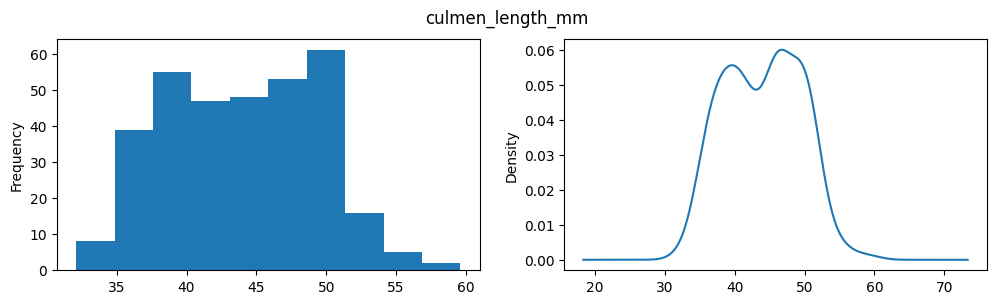

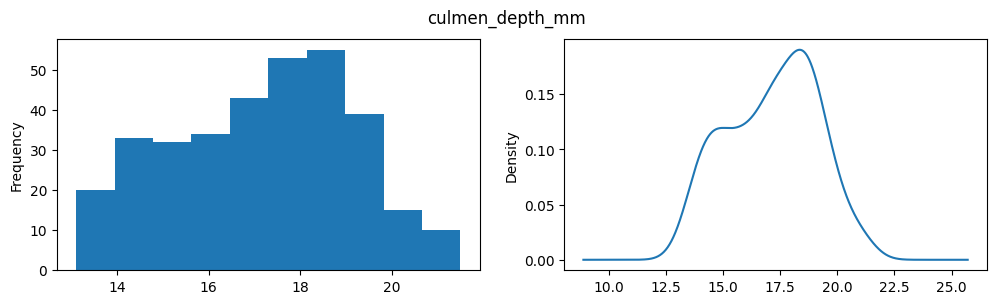

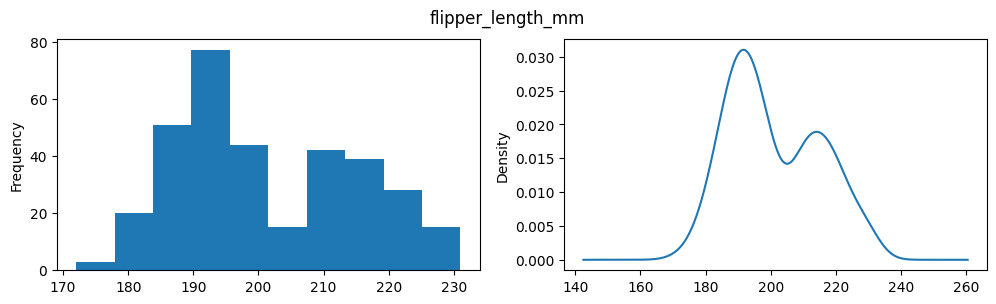

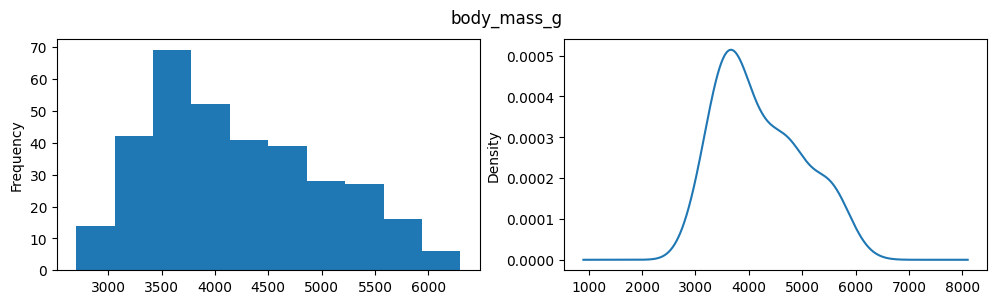

In [38]:
# Comprobar si la distribución de los datos se asemeja a una distribución normal
for num_col in df.select_dtypes(include=np.number).columns:
    fig, ax =plt.subplots(1,2)
    
    df[num_col].hist(figsize=(12, 3), grid=False, ax=ax[0])
    df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[1])
    
    ax[0].set_ylabel('Frequency')
    ax[1].set_ylabel('Density')
    fig.suptitle(num_col)
    plt.show()

In [39]:
# Función para obtener el numero de outliers segun z-score
def print_zscore_outliers(df: DataFrame, threshold: float) -> None:
    """
    Print dataset outliers percent
    
    :param df: input DataFrame
    :param threshold: z-score threshold to remove outliers
    
    :return: None
    """
    print('Original rows: ', df.shape[0])
    ### Print dataset outliers percent
    # find absolute value of z-score for each observation
    z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    # remove outliers
    df_clean = df[(z < threshold).all(axis=1)]
    # print outliers percent
    print('Outliers percent (all data): ', round((len(df) - len(df_clean)) / len(df) * 100, 2))

    ### Print dataset outliers percent per col
    print('Outliers percent (per col): ')
    for num_col in df.select_dtypes(include=np.number).columns:
        z = np.abs(stats.zscore(df[num_col]))
        df_clean = df[z < threshold]
        print(f"\t{num_col}: , {round((len(df) - len(df_clean)) / len(df) * 100, 2)}")

In [40]:
threshold = 3
print_zscore_outliers(df.select_dtypes(include=np.number), threshold=threshold)

Original rows:  334
Outliers percent (all data):  0.0
Outliers percent (per col): 
	culmen_length_mm: , 0.0
	culmen_depth_mm: , 0.0
	flipper_length_mm: , 0.0
	body_mass_g: , 0.0


In [41]:
threshold = 2
print_zscore_outliers(df.select_dtypes(include=np.number), threshold=threshold)

Original rows:  334
Outliers percent (all data):  8.38
Outliers percent (per col): 
	culmen_length_mm: , 1.8
	culmen_depth_mm: , 2.4
	flipper_length_mm: , 2.69
	body_mass_g: , 2.69


##### Rango intercuartil (*Inter Quartile Range(IQR)*)
- Método estadístico basado en el cálculo del primer y tercer cuartil (Q1, Q3) del conjunto de datos para poder identificar los rangos Q1-1.5*IQR y Q3+1.5*IQR
- Los outliers son los valores que se encuentran fuera de estos rangos.


<img src="https://almablog-media.s3.ap-south-1.amazonaws.com/image020_1_8ae950b8c7.png" width="800">

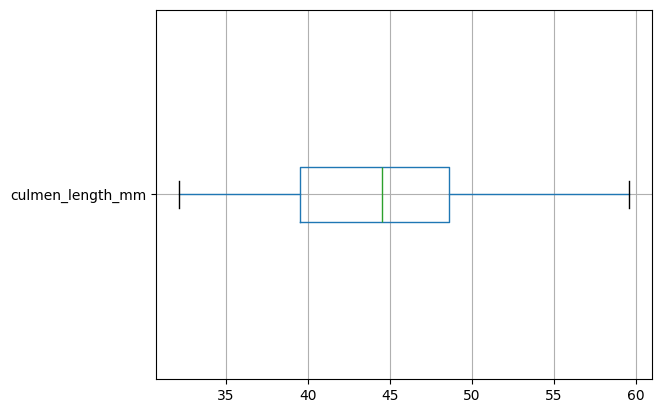

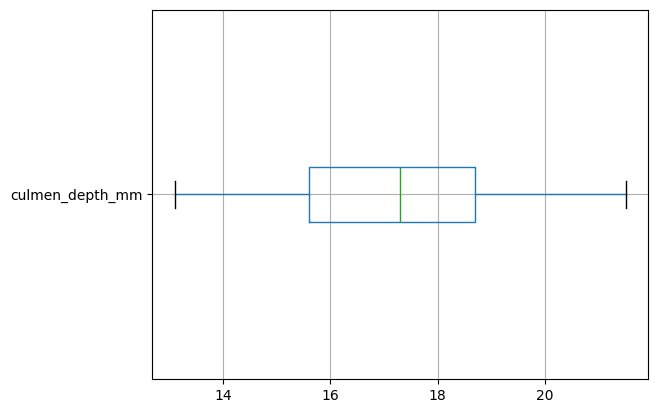

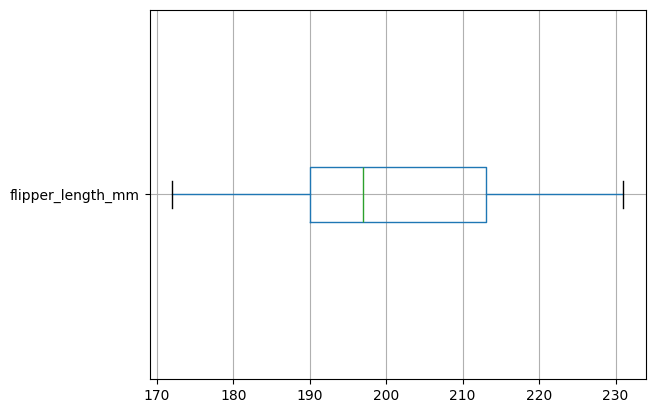

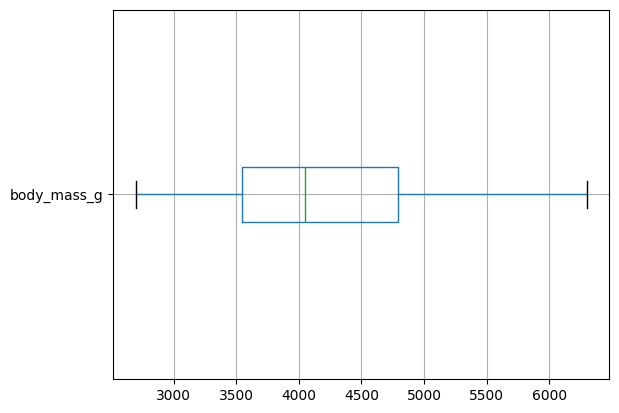

In [42]:
# Visualización de los diagramas de caja o boxplot de las variables
for num_col in df.select_dtypes(include=np.number).columns:
    df.boxplot(column=[num_col], vert=False)
    plt.show()

In [43]:
def print_iqr_outliers(df: DataFrame, threshold: float) -> None:
    """
    Print IQR outliers percent
    
    :param df: input DataFrame
    :param threshold: IQR threshold to remove outliers
    
    :return: None
    """
    print('Original rows: ', df.shape[0])    
    print('Outliers percent (per col): ')
    for num_col in df.select_dtypes(include=np.number).columns:
        # find Q1, Q3, IQR and limits
        Q1 = df[num_col].quantile(0.25)
        Q3 = df[num_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        # remove outliers
        df_clean = df[(df[num_col] > Q1 - threshold * IQR) | (df[num_col] < Q3 + threshold * IQR)]
        print(f"\t{num_col}: , {round((len(df) - len(df_clean)) / len(df) * 100, 2)}")

In [44]:
threshold = 3
print_iqr_outliers(df.select_dtypes(include=np.number), threshold=1.5)

Original rows:  334
Outliers percent (per col): 
	culmen_length_mm: , 0.0
	culmen_depth_mm: , 0.0
	flipper_length_mm: , 0.0
	body_mass_g: , 0.0


In [45]:
threshold = 1
print_iqr_outliers(df.select_dtypes(include=np.number), threshold=1.5)

Original rows:  334
Outliers percent (per col): 
	culmen_length_mm: , 0.0
	culmen_depth_mm: , 0.0
	flipper_length_mm: , 0.0
	body_mass_g: , 0.0


#### 3.2.1. Tratamiento de Outliers
- Eliminación:  se desechan las observaciones/entradas de datos/rows que contengan outliers.
- Imputación: los outliers se pueden imputar con valores.
- Transformación: la transformación de columnas/variables/features puede llegar a eliminar la presencia de outliers (cambiar la escala/ rango de los datos)



In [46]:
# Eliminacion
threshold = 2

z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df_clean = df[(z < threshold).all(axis=1)]
print('original rows: ', df.shape[0])
print('outliers cleaned rows: ', df_clean.shape[0])

original rows:  334
outliers cleaned rows:  306


In [47]:
df_clean.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [48]:
# Imputación
threshold = 3

z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
for num_col in df.select_dtypes(include=np.number).columns:
    z = np.abs(stats.zscore(df[num_col]))
    outliers = df[z > threshold]
    df[outliers] = np.nan
    df[num_col].fillna(df[num_col].median(), inplace=True)

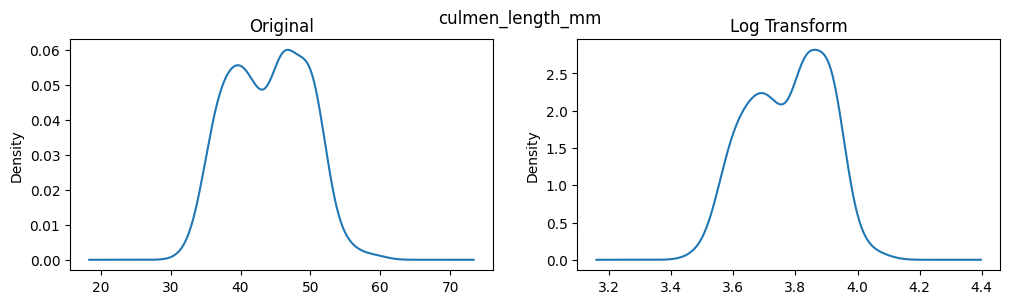

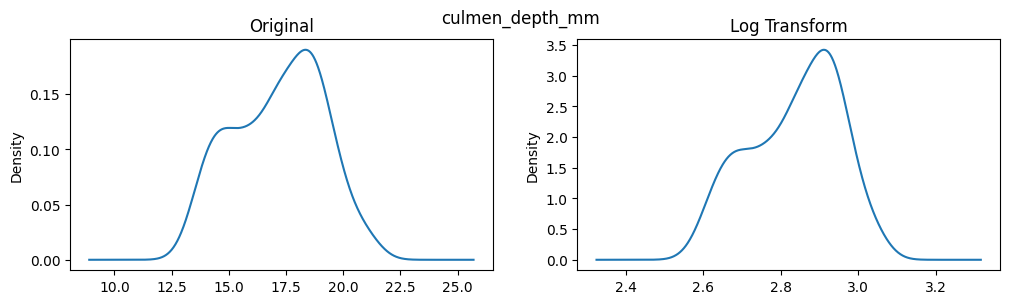

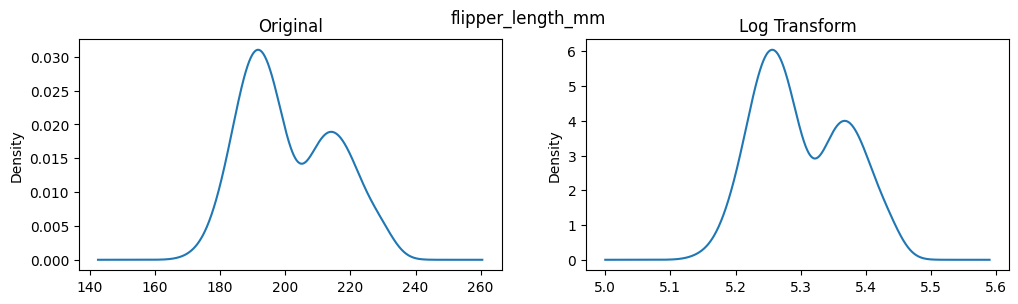

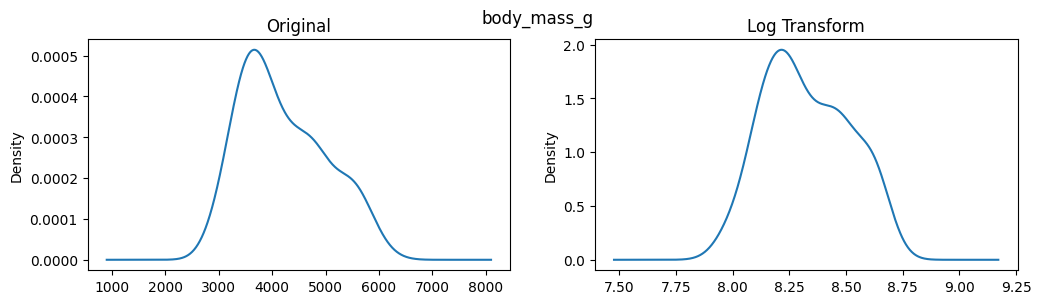

In [49]:
# Transformación: Log Transform
for num_col in df.select_dtypes(include=np.number).columns:
    fig, ax =plt.subplots(1,2)
    
    df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[0])
    np.log(df[num_col]).plot.density(figsize=(12, 3), grid=False, ax=ax[1])
    
    ax[0].title.set_text('Original')
    ax[1].title.set_text('Log Transform')
    ax[0].set_ylabel('Density')
    fig.suptitle(num_col)
    plt.show()


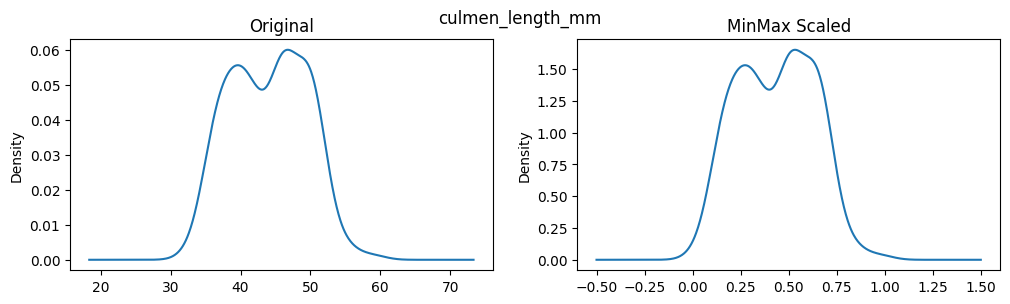

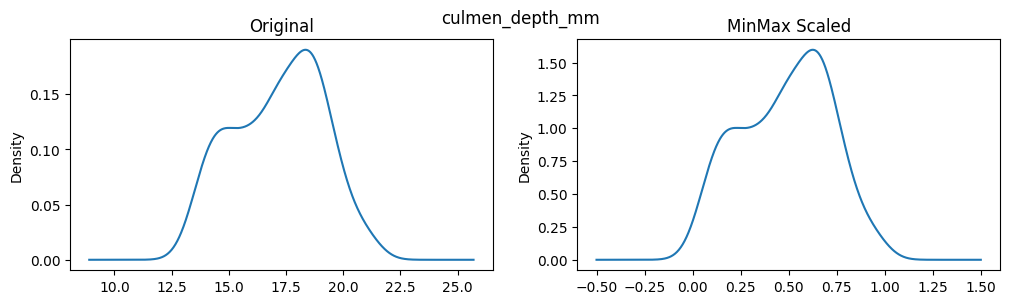

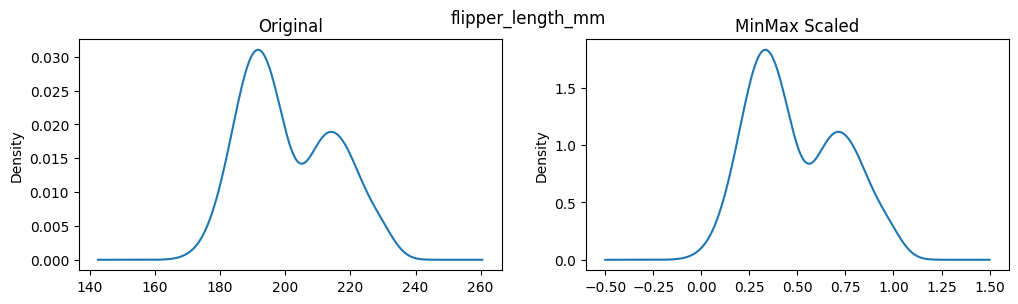

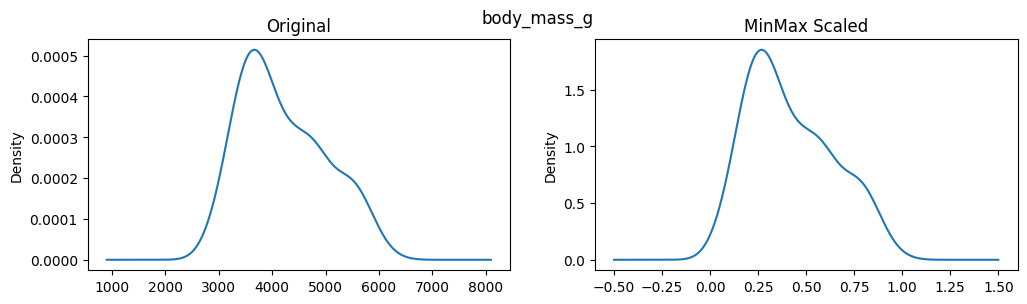

In [50]:
# Transformación: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df_scaled.select_dtypes(include=np.number).columns] = scaler.fit_transform(df_scaled.select_dtypes(include=np.number))

for num_col in df.select_dtypes(include=np.number).columns:
    fig, ax =plt.subplots(1,2)
    
    df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[0])
    df_scaled[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[1])
    
    ax[0].title.set_text('Original')
    ax[1].title.set_text('MinMax Scaled')
    ax[0].set_ylabel('Density')
    fig.suptitle(num_col)
    plt.show()


### 3.3. Valores duplicados

- Valores o entradas de datos repetidas dentro del dataset.
- Suelen desecharse: no suelen aportan valor en el entrenamiento de un modelo.
- Su eliminación puede realizarse por observación/fila o columna/feature.
  - .duplicated()
  - .drop_duplicates()

In [51]:
df.duplicated().sum()

0

In [52]:
df.drop_duplicates(keep='first', inplace=True)
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: "Literal['first', 'last', False]" = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : bool, default False
        Whether to modify the DataFrame rather than creati

### 3.4. Valores incorrectos

- Valores incorrectos, ya sea por error humano o no, intencional o no.
- La única manera de detectarlos es a través de la observación y el conocimiento de los datos y su contexto.
- Es recomendable realizar análisis de distribución, de frecuencias, etc. para poder llegar a detectarlos.


In [53]:
df.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [54]:
df.shape

(334, 7)

In [55]:
df = df[df['sex'].isin(['MALE', 'FEMALE'])]
# df = df[df['sex'] != ('.')]
# df = df[~df['sex'].isin(['.', ';', ',', '!', None])]

In [56]:
df.shape

(333, 7)

In [57]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

## 4. Transformacion de los datos (Data Transformation)
- Para mejorar su entendimiento.
- Para mejorar su rendimiento en el entrenamiento de un modelo de ML.
- Para adecuar su uso al proporcionarlos a un modelo de ML.

### 4.1. Escalado de datos (Scaling)

- Transformación de valores a un rango o escala concreta.
- Se utiliza  cuando los diferentes campos/columnas/features pueden poseer diferentes escalas 
- Ayuda a comparar diferentes campos al convertirlos a un mismo o similar rango de valores -> Ayuda en el entrenamiento del algoritmo de ML


In [58]:
df_num = df.select_dtypes(include=np.number)

#### Normalizacion
- Transforma los datos a una escala entre el menor y el mayor valor dados.
- Queremos cambiar el rango de los datos y que posean una distribución normal.

In [59]:
df_num_norm = (df_num-df_num.mean())/(df_num.max()-df_num.min())

In [60]:
df_num_norm.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.177920         0.182754          -0.338423    -0.126960
1         -0.163374         0.027992          -0.253677    -0.113071
2         -0.134283         0.099421          -0.101135    -0.265849
4         -0.265192         0.254183          -0.135033    -0.210294
5         -0.170647         0.408945          -0.185881    -0.154738

In [61]:
df_num.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0

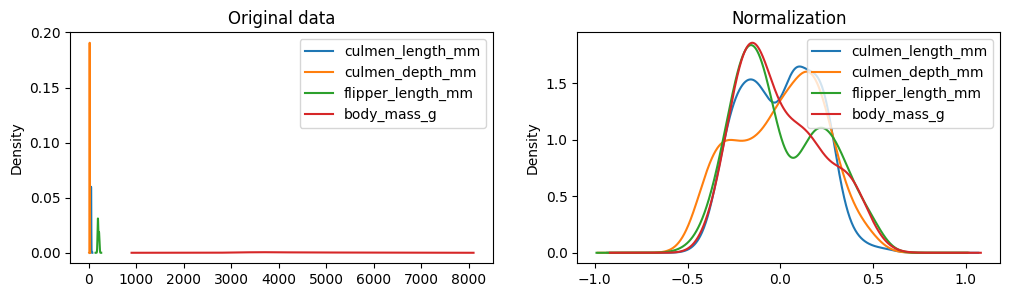

In [62]:
fig, ax =plt.subplots(1,2)

df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_norm.plot.density(figsize=(12, 3), grid=False, ax=ax[1])

ax[0].title.set_text('Original data')
ax[1].title.set_text('Normalization')

plt.show()

In [63]:
df.select_dtypes(include='O').join(df_num_norm, how='left').head()

species     island     sex  culmen_length_mm  culmen_depth_mm  \
0  Adelie  Torgersen    MALE         -0.177920         0.182754   
1  Adelie  Torgersen  FEMALE         -0.163374         0.027992   
2  Adelie  Torgersen  FEMALE         -0.134283         0.099421   
4  Adelie  Torgersen  FEMALE         -0.265192         0.254183   
5  Adelie  Torgersen    MALE         -0.170647         0.408945   

   flipper_length_mm  body_mass_g  
0          -0.338423    -0.126960  
1          -0.253677    -0.113071  
2          -0.101135    -0.265849  
4          -0.135033    -0.210294  
5          -0.185881    -0.154738

#### Escalado Mínimo-Máximo (Min-Max Scaling)
- Substrae a cada valor el valor mínimo del conjunto de datos y lo divide por el rango de dicho conjunto.
- Queremos cambiar el rango de los datos sin cambiar la forma de su distribución.
  - MinMaxScaler()


In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num_minmax = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [65]:
df_num_minmax.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0          0.254545         0.666667           0.152542     0.291667
1          0.269091         0.511905           0.237288     0.305556
2          0.298182         0.583333           0.389831     0.152778
3          0.167273         0.738095           0.355932     0.208333
4          0.261818         0.892857           0.305085     0.263889

In [66]:
df_num.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0

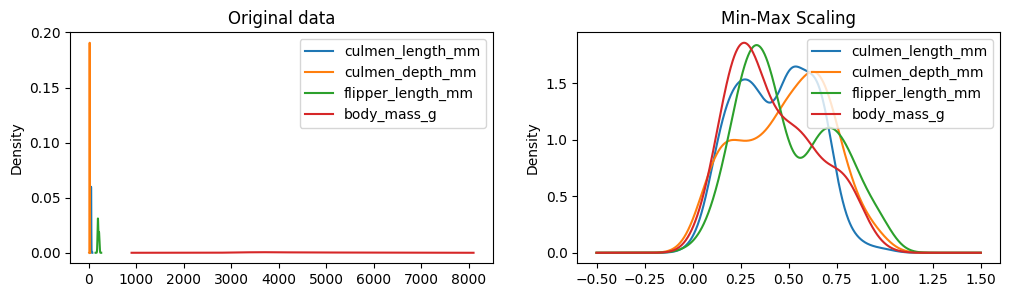

In [67]:
fig, ax =plt.subplots(1,2)

df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_minmax.plot.density(figsize=(12, 3), grid=False, ax=ax[1])

ax[0].title.set_text('Original data')
ax[1].title.set_text('Min-Max Scaling')

plt.show()

In [68]:
df.select_dtypes(include='O').join(df_num_norm, how='left').head()

species     island     sex  culmen_length_mm  culmen_depth_mm  \
0  Adelie  Torgersen    MALE         -0.177920         0.182754   
1  Adelie  Torgersen  FEMALE         -0.163374         0.027992   
2  Adelie  Torgersen  FEMALE         -0.134283         0.099421   
4  Adelie  Torgersen  FEMALE         -0.265192         0.254183   
5  Adelie  Torgersen    MALE         -0.170647         0.408945   

   flipper_length_mm  body_mass_g  
0          -0.338423    -0.126960  
1          -0.253677    -0.113071  
2          -0.101135    -0.265849  
4          -0.135033    -0.210294  
5          -0.185881    -0.154738

#### Estandarización (Standardization)
- Transforma los datos extrayendo la media y dividiendo por la desviación estándar.
- Queremos asegurarnos de que la media es cero y la desviación estándar es uno, ayudando al modelo en el entrenamiento.
  - StandardScaler()

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_std = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [70]:
df_num_std.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.896042         0.780732          -1.426752    -0.568475
1         -0.822788         0.119584          -1.069474    -0.506286
2         -0.676280         0.424729          -0.426373    -1.190361
3         -1.335566         1.085877          -0.569284    -0.941606
4         -0.859415         1.747026          -0.783651    -0.692852

In [71]:
df_num.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0

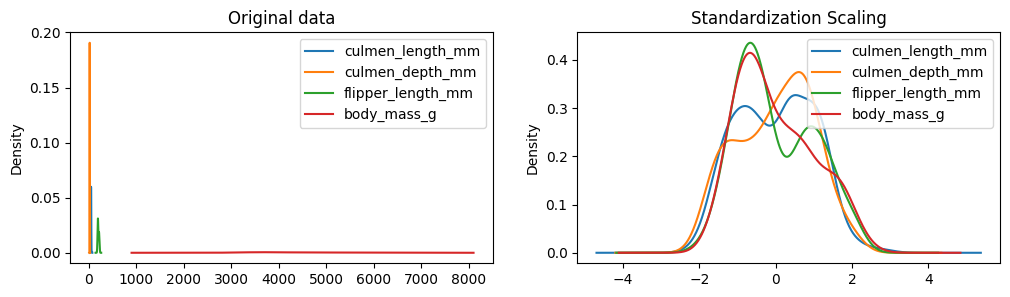

In [72]:
fig, ax =plt.subplots(1,2)

df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_std.plot.density(figsize=(12, 3), grid=False, ax=ax[1])

ax[0].title.set_text('Original data')
ax[1].title.set_text('Standardization Scaling')

plt.show()

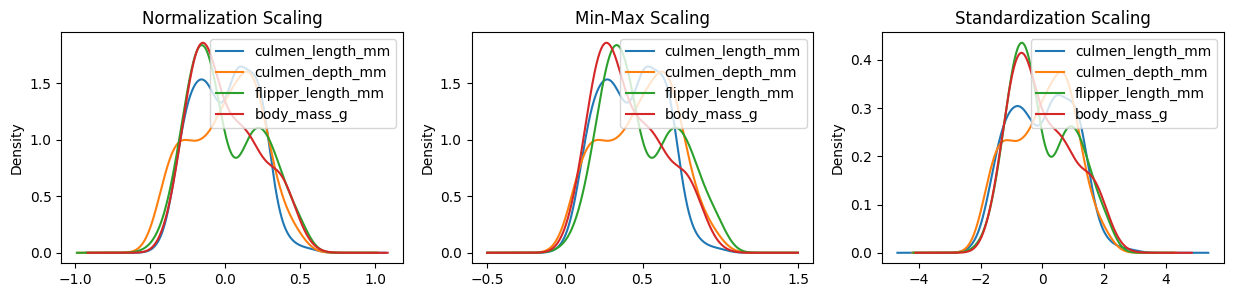

In [73]:
fig, ax =plt.subplots(1,3)

df_num_norm.plot.density(figsize=(15, 3), grid=False, ax=ax[0])
df_num_minmax.plot.density(figsize=(15, 3), grid=False, ax=ax[1])
df_num_std.plot.density(figsize=(15, 3), grid=False, ax=ax[2])

ax[0].title.set_text('Normalization Scaling')
ax[1].title.set_text('Min-Max Scaling')
ax[2].title.set_text('Standardization Scaling')

plt.show()

In [74]:
df.select_dtypes(include='O').join(df_num_minmax).head()

species     island     sex  culmen_length_mm  culmen_depth_mm  \
0  Adelie  Torgersen    MALE          0.254545         0.666667   
1  Adelie  Torgersen  FEMALE          0.269091         0.511905   
2  Adelie  Torgersen  FEMALE          0.298182         0.583333   
4  Adelie  Torgersen  FEMALE          0.261818         0.892857   
5  Adelie  Torgersen    MALE          0.247273         0.559524   

   flipper_length_mm  body_mass_g  
0           0.152542     0.291667  
1           0.237288     0.305556  
2           0.389831     0.152778  
4           0.305085     0.263889  
5           0.152542     0.256944

### 4.2. Codificación (Encoding)
- Transformación de valores categóricos en valores numéricos.
- Suele ser necesaria ya que los diferentes algoritmos de machine learning, por norma general, solo aceptan la ingesta de datos numéricos.

In [75]:
df_cat = df.select_dtypes(include='O')

In [76]:
df_cat.head()

species     island     sex
0  Adelie  Torgersen    MALE
1  Adelie  Torgersen  FEMALE
2  Adelie  Torgersen  FEMALE
4  Adelie  Torgersen  FEMALE
5  Adelie  Torgersen    MALE

#### Label/Ordinal Encoding
- Codificación de categorías con valores enteros siguiendo un orden: 0, 1, 2, etc.
  - LabelEncoder()

In [77]:
# specify the order of the categories
ordinal_sex_map = {'MALE': 0, 'FEMALE': 1}

# perform ordinal encoding on the 'quality' column
df_cat['sex'].map(ordinal_sex_map).value_counts()

0    168
1    165
Name: sex, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
df_cat_le = df_cat.apply(LabelEncoder().fit_transform)
df_cat_le.head()

species  island  sex
0        0       2    1
1        0       2    0
2        0       2    0
4        0       2    0
5        0       2    1

In [79]:
for col in df_cat.columns:
    print(col, ':', list(set(df[col])),'-->' , list(set((df_cat_le[col]))))

species : ['Adelie', 'Chinstrap', 'Gentoo'] --> [0, 1, 2]
island : ['Biscoe', 'Torgersen', 'Dream'] --> [0, 1, 2]
sex : ['FEMALE', 'MALE'] --> [0, 1]


#### One-Hot/Dummy Encoding
- Codificación de cada valor único con la creación de una nueva variable.
- cada nueva variable es mapeada con valores binarios de 0 o 1 indicando la ausencia (0) o presencia (1) de dicho valor.
- Se suele utilizar cuando las variables o features son nominales (no tienen un orden concreto).
- El **Dummy encoding** es similar al one-hot encoding: para el caso de one-hot, N categorías/valores únicos crean N variables binarias nuevas; en el caso del dummy encoding, crea N-1 variables nuevas
    - .get_dummies()
    - .get_dummies(drop_first=True)

In [80]:
# One-hot encoding
pd.get_dummies(df_cat['species']).head()

Adelie  Chinstrap  Gentoo
0       1          0       0
1       1          0       0
2       1          0       0
4       1          0       0
5       1          0       0

In [81]:
df_cat_onehot = pd.get_dummies(df_cat).astype(int)

df_cat_onehot.head()

species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0               1                  0               0              0   
1               1                  0               0              0   
2               1                  0               0              0   
4               1                  0               0              0   
5               1                  0               0              0   

   island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0             0                 1           0         1  
1             0                 1           1         0  
2             0                 1           1         0  
4             0                 1           1         0  
5             0                 1           0         1

In [82]:
# Dummy encoding
pd.get_dummies(df_cat['species'], drop_first=True, prefix='species').head()

species_Chinstrap  species_Gentoo
0                  0               0
1                  0               0
2                  0               0
4                  0               0
5                  0               0

In [83]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True).astype(int)

df_cat_dummy.head()

species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  sex_MALE
0                  0               0             0                 1         1
1                  0               0             0                 1         0
2                  0               0             0                 1         0
4                  0               0             0                 1         0
5                  0               0             0                 1         1

In [84]:
pd.get_dummies(df_cat['species']).sample(n=4, random_state=1).astype(int)

Adelie  Chinstrap  Gentoo
65        1          0       0
276       0          0       1
186       0          1       0
198       0          1       0

In [85]:
pd.get_dummies(df_cat['species'], drop_first=True).sample(n=4, random_state=1).astype(int)

Chinstrap  Gentoo
65           0       0
276          0       1
186          1       0
198          1       0

#### Binary Encoding
- Codifica los valores con valores binarios únicos sin crear nuevas variables.


In [86]:
df_cat_binary = df_cat.copy()

# specify the order of the categories
binary_species_map = {'Gentoo': 0, 'Adelie': 1, 'Chinstrap': 2}

# perform binary encoding on the 'species' column
df_cat_binary['species'] = df_cat_binary['species'].map(binary_species_map).apply(lambda x: format(x, 'b'))

df_cat_binary['species'].unique()

array(['1', '10', '0'], dtype=object)

In [87]:
for col in df_cat_binary.columns:
    le = LabelEncoder()
    ids = le.fit_transform(df_cat_binary[col])
    mapping = dict(zip(le.classes_, range(len(le.classes_))))
    df_cat_binary[col] = df_cat_binary[col].map(mapping).astype(int).apply(lambda x: format(x, 'b'))

In [88]:
for col in df_cat_binary.columns:
    print(col, ':', list(set(df_cat[col])),'-->' , list(set((df_cat_binary[col]))))

species : ['Adelie', 'Chinstrap', 'Gentoo'] --> ['0', '10', '1']
island : ['Biscoe', 'Torgersen', 'Dream'] --> ['1', '0', '10']
sex : ['FEMALE', 'MALE'] --> ['0', '1']


#### Frequency/Count Encoding
- Codificación basada en el conteo o frecuencia de cada categoría.
- Induce involuntariamente un sesgo de orden.

In [89]:
df_cat_freq = df_cat.copy()

# perform count encoding on the 'fruit' column
df_cat_freq['species'] = df_cat_freq['species'].map(df_cat_freq['species'].value_counts())

print('species: ', df_cat_freq['species'].unique())

species:  [146  68 119]


#### Target Encoding
- Codificación basada en el cálculo del valor promedio de la frecuencia del target/label/clase  para cada categoría.
- El dataset mantiene el mismo tamaño inicial.
- Puede llegar a producir un sobreajuste o overfitting si el dataset no se ha particionado previamente en train-test/train-eval-test

In [90]:
df_cat_target = df_cat.copy()

le = LabelEncoder()
df_cat_target['target'] = le.fit_transform(df_cat_target['island'])

target_mean = df_cat_target.groupby('species')['target'].mean()

In [91]:
target_mean

species
Adelie       1.020548
Chinstrap    1.000000
Gentoo       0.000000
Name: target, dtype: float64

In [92]:
df_cat.columns

Index(['species', 'island', 'sex'], dtype='object')

In [93]:
# Replace the categorical data with the mean target value
for col in df_cat.columns:
    target_mean = df_cat_target.groupby(col)['target'].mean()
    df_cat_target[col] = df_cat_target[col].map(target_mean)
    
df_cat_target.head()

species  island       sex  target
0  1.020548     2.0  0.642857       2
1  1.020548     2.0  0.660606       2
2  1.020548     2.0  0.660606       2
4  1.020548     2.0  0.660606       2
5  1.020548     2.0  0.642857       2

#### Solucion aplicada: label encoding

In [94]:
le = LabelEncoder()

df = df_cat.apply(LabelEncoder().fit_transform).join(df.select_dtypes(include=np.number), how='left')

In [95]:
df.head()

species  island  sex  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2    1              39.1             18.7              181.0   
1        0       2    0              39.5             17.4              186.0   
2        0       2    0              40.3             18.0              195.0   
4        0       2    0              36.7             19.3              193.0   
5        0       2    1              39.3             20.6              190.0   

   body_mass_g  
0       3750.0  
1       3800.0  
2       3250.0  
4       3450.0  
5       3650.0

### 4.3. Discretización (Discretization)
- La discretización o discretization consiste en la conversión o transformación de variables/features continuas (temperatura, tiempo, peso, etc.) en discretas. 
- Facilita el entendimiento de la variable y la detección de outliers.
- El objetivo es mejorar el rendimiento del algoritmo de ML en el aprendizaje.

#### Uniforme (Uniform discretization or Equal-width)
- Consiste en dividir el rango de la variable continua entre n intervalos de igual tamaño o bins.
- La ventaja y desventaja al mismo tiempo de este tipo de discretización es que no afecta significativamente a la distribución de la variable.
    - pandas.cut()

In [96]:
df['flipper_length_bins'] =  pd.cut(df['flipper_length_mm'].values, bins=3, labels=[0, 1, 2])

In [97]:
print('short: ', 'max-min diff: ', df[df['flipper_length_bins'] ==  0]['flipper_length_mm'].max() - df[df['flipper_length_bins'] ==  0]['flipper_length_mm'].min())
print('medium: ', 'max-min diff: ', df[df['flipper_length_bins'] ==  1]['flipper_length_mm'].max() - df[df['flipper_length_bins'] ==  1]['flipper_length_mm'].min())
print('long: ', 'max-min diff: ', df[df['flipper_length_bins'] ==  2]['flipper_length_mm'].max() - df[df['flipper_length_bins'] ==  2]['flipper_length_mm'].min())

short:  max-min diff:  19.0
medium:  max-min diff:  19.0
long:  max-min diff:  19.0


In [98]:
df['flipper_length_bins'].value_counts()

1    131
0    108
2     94
Name: flipper_length_bins, dtype: int64

In [99]:
df[['flipper_length_mm', 'flipper_length_bins']]

flipper_length_mm flipper_length_bins
0                181.0                   0
1                186.0                   0
2                195.0                   1
4                193.0                   1
5                190.0                   0
..                 ...                 ...
338              214.0                   2
340              215.0                   2
341              222.0                   2
342              212.0                   2
343              213.0                   2

[333 rows x 2 columns]

#### Quantile discretization
- Consiste en ordenar los valores continuos de la variable en intervalos con el mismo número de observaciones o frecuencia.
- Aunque el tamaño de los bins no sea el mismo para todos los bins, cada bin posee el mismo número de valores.
- Es útil para la detección de datos extremos o outliers.
  - pandas.qcut()

In [100]:
df['flipper_length_bins'] =  pd.qcut(df['flipper_length_mm'], q=4)

In [101]:
df['flipper_length_bins'].value_counts()

(171.999, 190.0]    95
(197.0, 213.0]      81
(213.0, 231.0]      81
(190.0, 197.0]      76
Name: flipper_length_bins, dtype: int64

In [102]:
df['flipper_length_bins'] =  pd.qcut(df['flipper_length_mm'], q=4, labels=[0, 1, 2, 3])

In [103]:
df['flipper_length_bins'].value_counts()

0    95
2    81
3    81
1    76
Name: flipper_length_bins, dtype: int64

#### Discretización avanzada con uso de algoritmos de ML
- Existen otros tipos de discretización más avanzados que requieren el uso de algoritmos de ML:
  - Clustering con K-means
  - Árboles de decisión
  - etc.
  
[link con ejemplo practico](https://machinelearningmastery.com/discretization-transforms-for-machine-learning/)

#### Aplicacion final

In [104]:
df['flipper_length_bins'] =  pd.cut(df['flipper_length_mm'].values, bins=3, labels=[0, 1, 2]).astype(int)
df['culmen_length_bins'] =  pd.cut(df['culmen_length_mm'].values, bins=3, labels=[0, 1, 2]).astype(int)
df['culmen_depth_bins'] =  pd.cut(df['culmen_depth_mm'].values, bins=3, labels=[0, 1, 2]).astype(int)

### 4.4. Reducción dimensional (Dimensionality reduction)
- La reducción de dimensiones o dimensionality reduction consiste en limitar el número de variables o features en un dataset para preservar únicamente la información relevante.
- Esta reducción puede ser lineal o no lineal, dependiendo del método usado.

In [105]:
df.dtypes

species                  int64
island                   int64
sex                      int64
culmen_length_mm       float64
culmen_depth_mm        float64
flipper_length_mm      float64
body_mass_g            float64
flipper_length_bins      int64
culmen_length_bins       int64
culmen_depth_bins        int64
dtype: object

#### Selección de variables (Feature selection)

##### Métodos de filtrado (Filter Methods)
- Selecciona un subset de features basado en su relación estadística con el target/etiqueta/label
  - Chi-cuadrado: :prueba estadística para evaluar la probabilidad de correlación utilizando su distribución de frecuencia.
  - ANOVA: análisis de la varianza: prueba estadística de si las medias de varios grupos son iguales o no.
  - Pearson: mide la relación estadística entre dos variables continuas lineales.
  - etc.

##### Chi-cuadrado, ANOVA
- sklearn.feature_selection: SelectKBest, chi2, f_classif

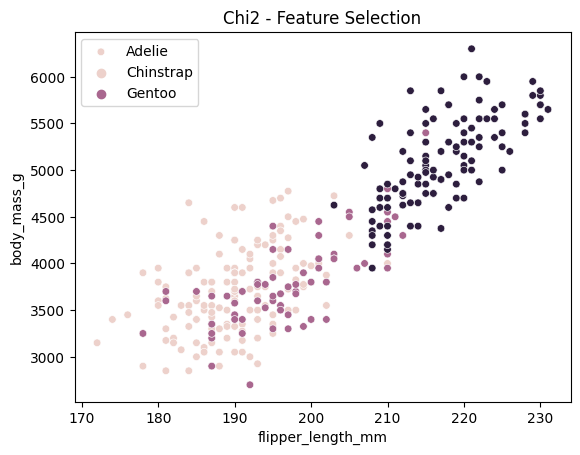

''

In [106]:
from sklearn.feature_selection import (
    SelectKBest,
    chi2,
    f_classif) # ANOVA

X =df.drop('species', axis=1)
y = df.species

fs = SelectKBest(score_func=chi2, k=2)
fs.fit(X, y)

X_train_fs = pd.DataFrame(fs.transform(X), columns = X.columns[fs.get_support()])
X_y_fs = X_train_fs.join(y, how='right')

# Representación 2D
target_names = df.species
colors = ["navy", "turquoise", "darkorange"]
lw = 2

sns.scatterplot(data=X_y_fs, x=X_y_fs.columns[0], y=X_y_fs.columns[1], hue="species", s=30)
    
plt.legend(species_name, loc="best", shadow=False, scatterpoints=1)
plt.title("Chi2 - Feature Selection")
plt.show()
;

##### Pearson
- .corr()

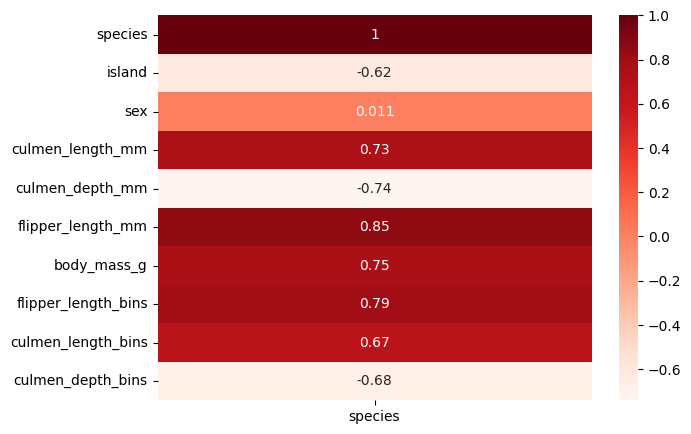

In [107]:
#### Correlación de Pearson/Spearman

target_correlation = df.corr(method='pearson')[['species']]  # method = 'spearman'

plt.figure(figsize=(7,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [108]:
target_correlation[abs(target_correlation)>0.5].dropna().sort_values('species', ascending=False)

species
species              1.000000
flipper_length_mm    0.850737
flipper_length_bins  0.790470
body_mass_g          0.750434
culmen_length_mm     0.730548
culmen_length_bins   0.666664
island              -0.622428
culmen_depth_bins   -0.684839
culmen_depth_mm     -0.740346

##### Métodos de envoltura (Wrapper Methods)
- Selecciona un subset de features en base a su mejor desempeño al compararlo con otros subsets.
  - Backward selection: eliminacion sistematica de features.
  - Forward selection: adicion sistematica de features.
  - Recursive Feature Elimination: en base al desempeño de las features.
    - SequentialFeatureSelector
    - RFE

*Implica utilizar el algoritmo/estimador de ML que se va a entrenar

*Implica utilizar la métrica de evaluación que se va a usar

[Guia práctica para Feature Selection usando Wrapper Methods](https://michael-fuchs-python.netlify.app/2019/09/27/wrapper-methods/)

In [109]:
from sklearn.feature_selection import SequentialFeatureSelector, RFE


In [110]:
help(SequentialFeatureSelector)

Help on class SequentialFeatureSelector in module sklearn.feature_selection._sequential:

class SequentialFeatureSelector(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  SequentialFeatureSelector(estimator, *, n_features_to_select='auto', tol=None, direction='forward', scoring=None, cv=5, n_jobs=None)
 |  
 |  Transformer that performs Sequential Feature Selection.
 |  
 |  This Sequential Feature Selector adds (forward selection) or
 |  removes (backward selection) features to form a feature subset in a
 |  greedy fashion. At each stage, this estimator chooses the best feature to
 |  add or remove based on the cross-validation score of an estimator. In
 |  the case of unsupervised learning, this Sequential Feature Selector
 |  looks only at the features (X), not the desired outputs (y).
 |  
 |  Read more in the :ref:`User Guide <sequential_feature_selection>`.
 |  
 |  .. versionadded:: 0.24
 |  
 |  Parameters
 |  -----

In [111]:
help(RFE)

Help on class RFE in module sklearn.feature_selection._rfe:

class RFE(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
 |  
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through
 |  any specific attribute or callable.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in

##### Métodos embebidos (Embedded Methods)
- Consiste en aplicar una regresión lineal regularizada: evita que el modelo entrene con features demasiado complejas para que generalice mejor.
  - LASSO
  - Ridge
  - Elastic Net
  - etc.
- Tambien otros tipos de métodos como arboles de decision (Random Forest, etc.)
- Dará un peso a cada feature según su importancia en el modelo.

*Implica utilizar modelos de clasificación o regresión, segun nuestro caso.

*Implica utilizar la métrica de evaluación que se va a usar

[Guia práctica para Feature Selection usando Embedded Methods (Lasso, Ridge, Elastic Net)](https://michael-fuchs-python.netlify.app/2019/10/08/embedded-methods/)
- [Aplicacion de Embedded method: Random Forest](https://www.enjoyalgorithms.com/blog/feature-selection-techniques)

In [112]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier

In [113]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso).
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term, controlling regularization
 |      strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.
 |  
 |      When `alpha = 0`, the objective is equivalent to ordinary least
 |      squares, solved by the :class:`LinearR

In [114]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

#### Extracción de variables (Feature extraction)

Análisis principal de componentes o Principal Component Analysis (PCA)
  - Método que busca un espacio dimensional más bajo preservando la varianza del espacio dimensional original utilizando transformaciones lineales.

[Explicación extensa y práctica de PCA paso a paso](https://www.geeksforgeeks.org/principal-component-analysis-pca/)

Total Explained Variance: 100.00%


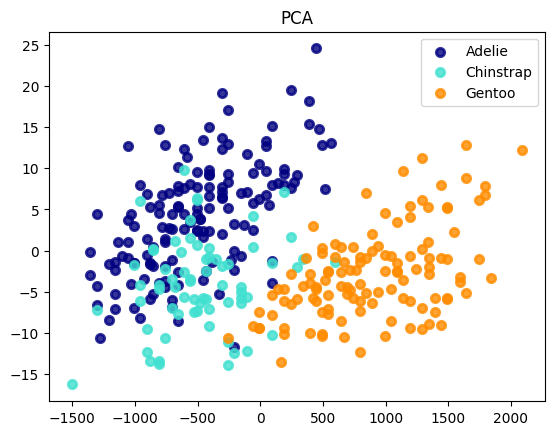

In [115]:
from sklearn.decomposition import PCA

# Division del dataset en campos/features y variable objetivo
X =df.drop('species', axis=1)
y = df.species

# Construcción del objeto PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df.drop('species', axis=1)) 

# Representación 2D del PCA
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Total Explained Variance: {total_var:.2f}%') # % de varianza preservado

target_names = df.species
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        components[y == i, 0], components[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
    
plt.legend(species_name, loc="best", shadow=False, scatterpoints=1)
plt.title("PCA")
plt.show()

In [116]:
import plotly.express as px

pca = PCA(n_components=3)
components = pca.fit_transform(df.drop('species', axis=1)) 

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

#### Análisis discriminatorio lineal o Linear Discriminant Analysis (LDA)
- Método que se usa para encontrar una combinación lineal de features en un dataset. 

[Explicación extensa y práctica de LDA paso a paso](https://medium.com/accel-ai/lda-algorithm-tutorial-in-python-57ee62e71965)

Total Explained Variance: 100.00%


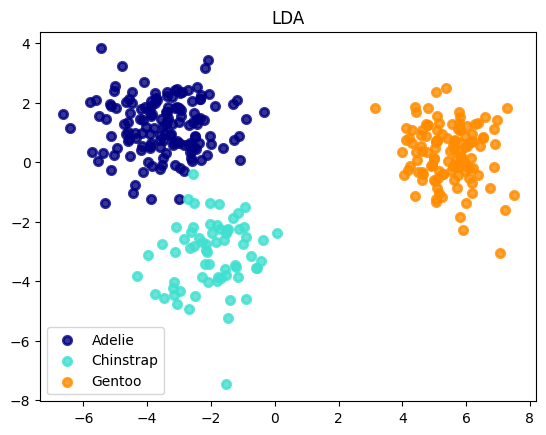

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
components = lda.fit_transform(X=X, y=y) 

total_var = lda.explained_variance_ratio_.sum() * 100
print(f'Total Explained Variance: {total_var:.2f}%')

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        components[y == i, 0], components[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.legend(species_name, loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")
plt.show()

#### Análisis discriminatorio generalizado/gaussiano o Generalized/Gaussian Discriminant Analysis (GDA)
- método basado en el LDA que asume que las diferentes clases siguen una distribución Gaussiana o normal, además de no asumir que las matrices de covarianza son iguales.

[Explicación matemática de GDA](https://www.geeksforgeeks.org/gaussian-discriminant-analysis/)

### 4.5. Ingeniería de variables

- Consiste en la creación de nuevas variables o features a partir de las features originales.
- Objetivo: obtener features más valiosas/significativas que ayuden a mejorar el desempeño del modelo de ML.
- Requiere de análisis e imaginación.
- Este termino también puede englobar el proceso completo de todas las secciones anteriores o sinónimo del data preparation.


In [118]:
df.columns

Index(['species', 'island', 'sex', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'flipper_length_bins',
       'culmen_length_bins', 'culmen_depth_bins'],
      dtype='object')

In [119]:
df_2 = pd.read_csv('penguins_lter.csv')
df_2.columns.tolist()

['studyName',
 'Sample Number',
 'Species',
 'Region',
 'Island',
 'Stage',
 'Individual ID',
 'Clutch Completion',
 'Date Egg',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)',
 'Comments']

<img src="https://fossilpenguins.files.wordpress.com/2012/01/thomas.jpg" width="800">

<img src="https://royalsocietypublishing.org/cms/asset/751e0c57-b3cb-417a-a154-8a0b24770e7a/rspb20152033f03.jpg" width="800">

[Body Girth as an Alternative to Body Mass for Establishing Condition Indexes in Field Studies: A Validation in the King Penguin](https://www.researchgate.net/figure/Relationship-between-body-mass-M-b-and-body-girth-G-b-in-king-penguins-Data-are_fig1_259711305)

#### Analisis bivariable

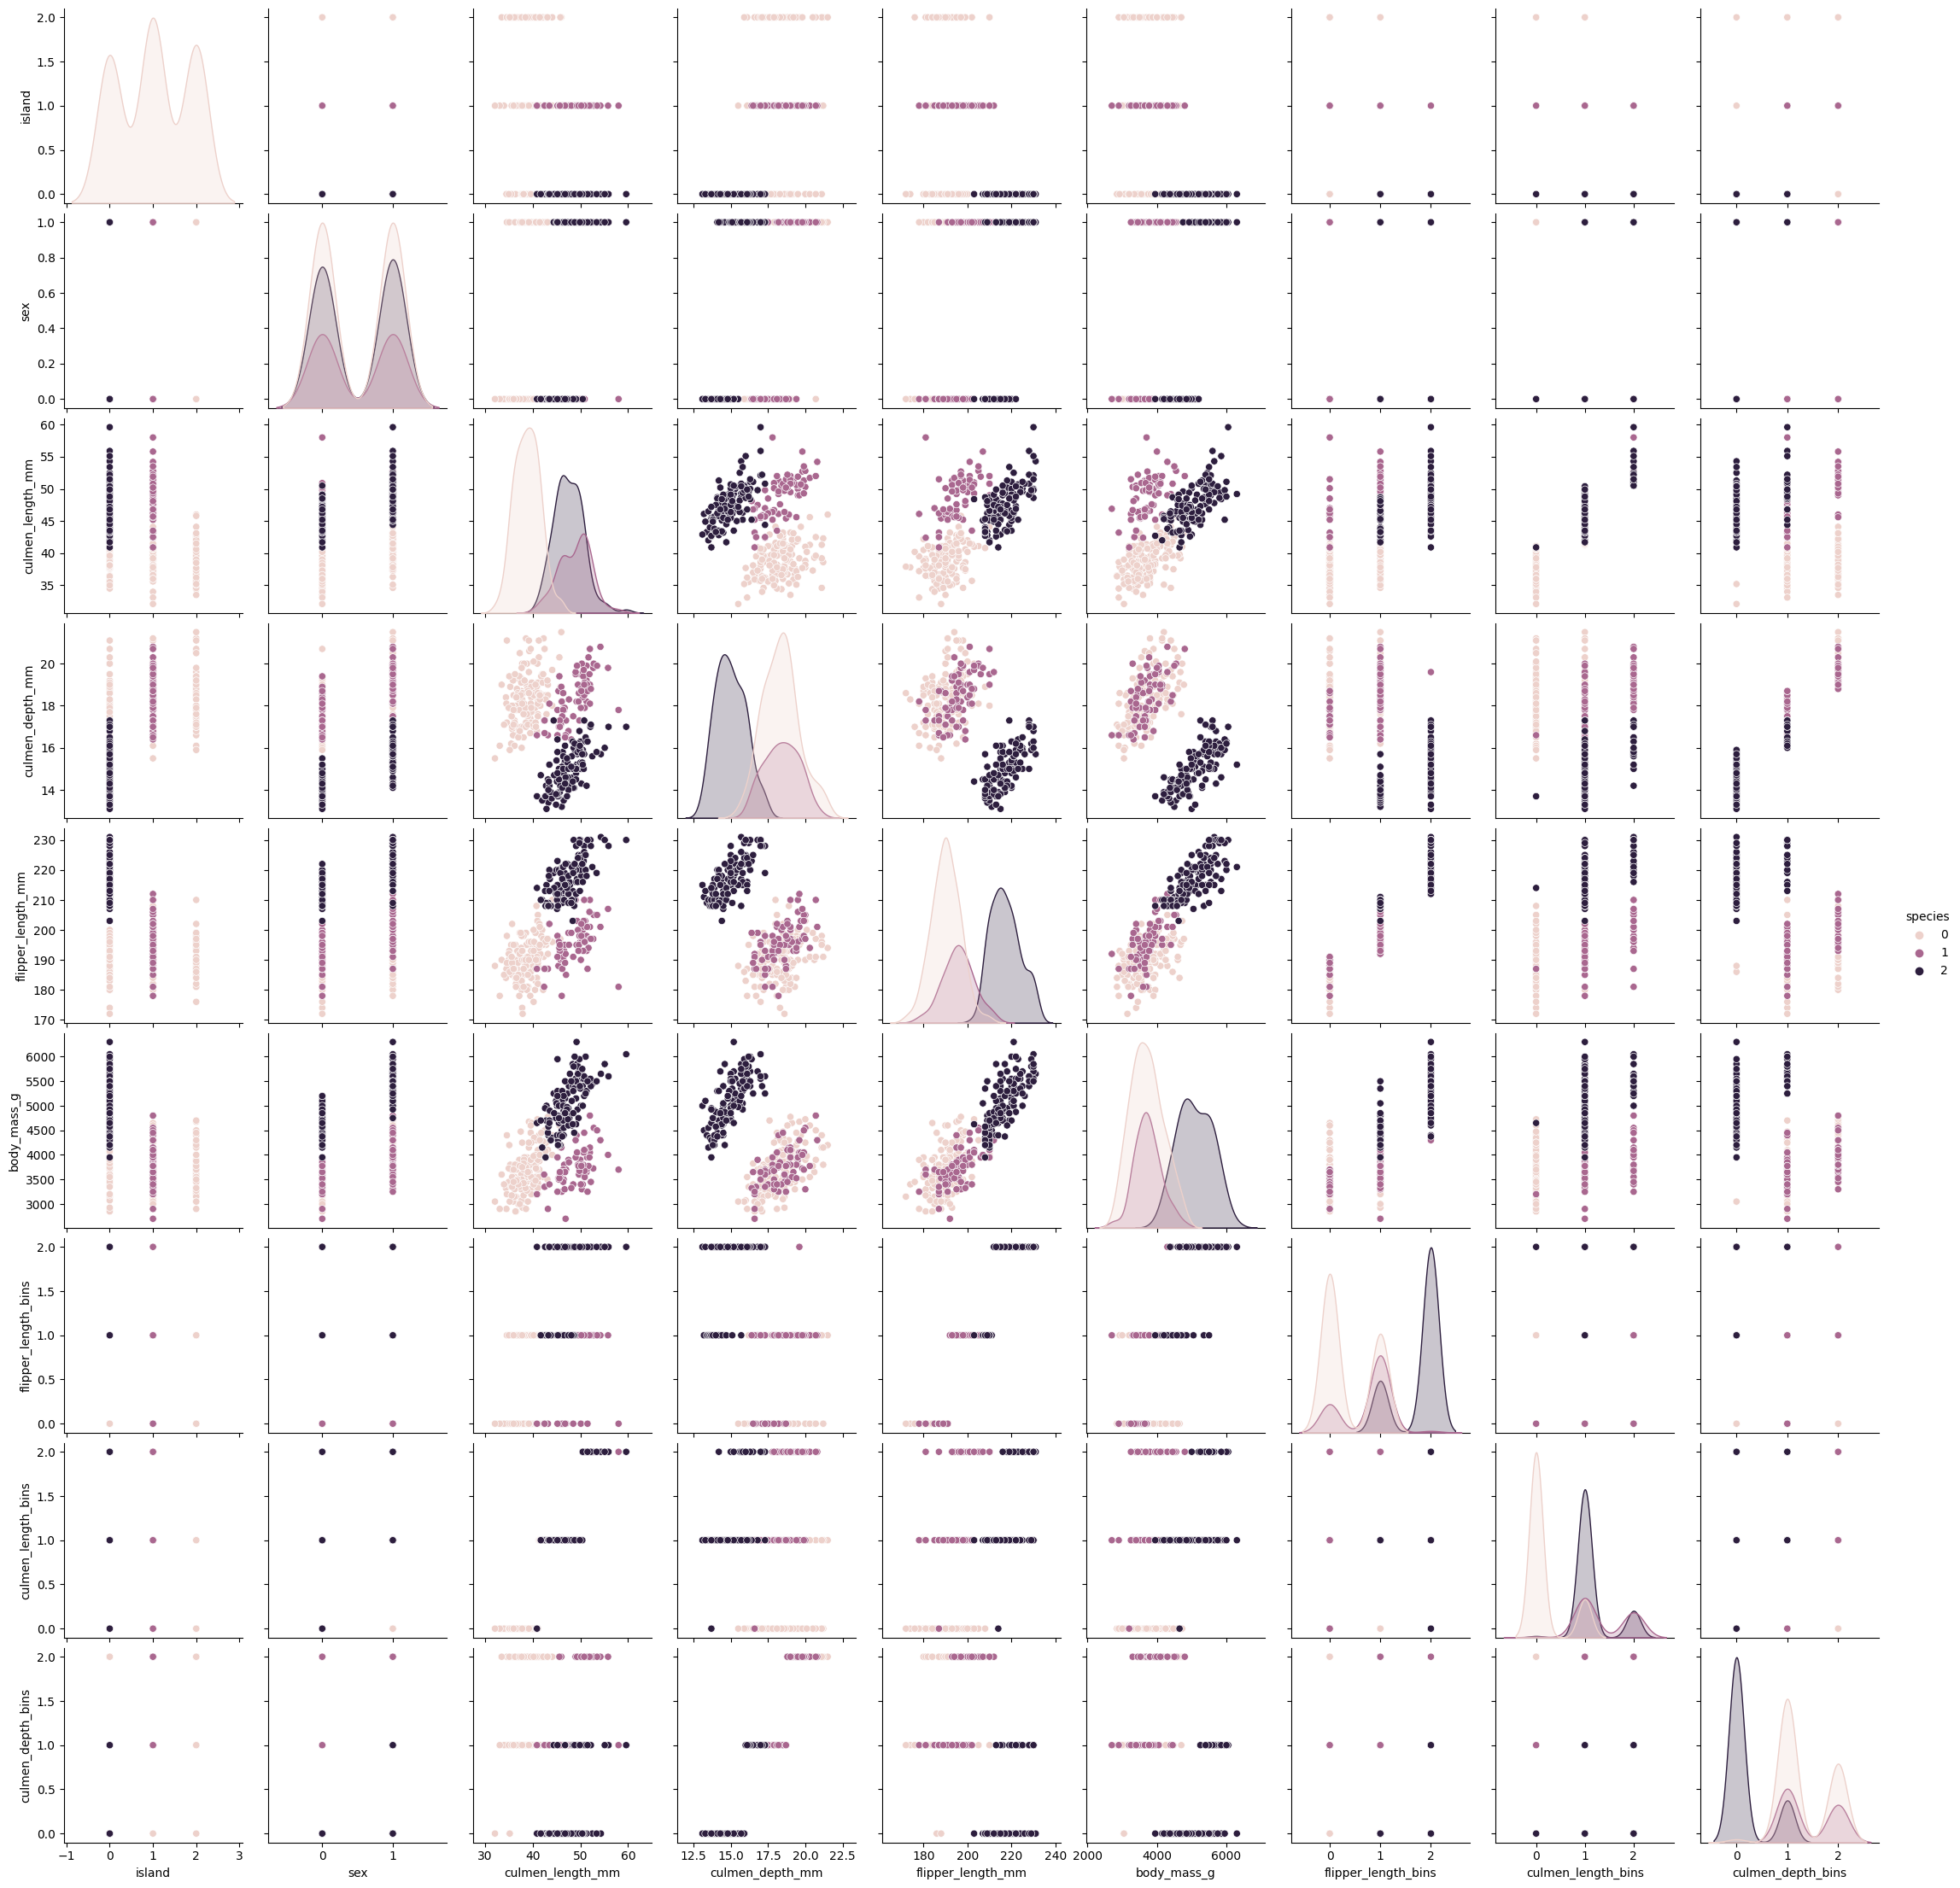

In [120]:
import seaborn as sns

%matplotlib inline

sns.pairplot(df.select_dtypes(include=np.number), hue="species")

In [121]:
print('Covariance:')
df.cov()

Covariance:


species      island         sex  culmen_length_mm  \
species                0.791599   -0.395799    0.004884          3.554534   
island                -0.395799    0.510818   -0.004450         -1.317880   
sex                    0.004884   -0.004450    0.250733          0.942201   
culmen_length_mm       3.554534   -1.317880    0.942201         29.906333   
culmen_depth_mm       -1.297134    0.799471    0.367478         -2.462091   
flipper_length_mm     10.608759   -5.553710    1.790812         50.058195   
body_mass_g          537.622110 -322.007173  171.353658       2595.623304   
flipper_length_bins    0.547786   -0.288786    0.096575          2.664756   
culmen_length_bins     0.396369   -0.134095    0.092939          3.283526   
culmen_depth_bins     -0.444643    0.274196    0.117741         -0.860073   

                     culmen_depth_mm  flipper_length_mm    body_mass_g  \
species                    -1.297134          10.608759     537.622110   
island                      0.799471          -5.553710    -322.007173   
sex                         0.367478           1.790812     171.353658   
culmen_length_mm           -2.462091          50.058195    2595.623304   
culmen_depth_mm             3.877888         -15.947248    -748.456122   
flipper_length_mm         -15.947248         196.441677    9852.191649   
body_mass_g              -748.456122        9852.191649  648372.487699   
flipper_length_bins        -0.804494          10.016679     506.547587   
culmen_length_bins         -0.249626           5.540333     267.266589   
culmen_depth_bins           1.318968          -5.489942    -265.689334   

                     flipper_length_bins  culmen_length_bins  \
species                         0.547786            0.396369   
island                         -0.288786           -0.134095   
sex                             0.096575            0.092939   
culmen_length_mm                2.664756            3.283526   
culmen_depth_mm                -0.804494           -0.249626   
flipper_length_mm              10.016679            5.540333   
body_mass_g                   506.547587          267.266589   
flipper_length_bins             0.606661            0.297225   
culmen_length_bins              0.297225            0.446561   
culmen_depth_bins              -0.282653           -0.086581   

                     culmen_depth_bins  
species                      -0.444643  
island                        0.274196  
sex                           0.117741  
culmen_length_mm             -0.860073  
culmen_depth_mm               1.318968  
flipper_length_mm            -5.489942  
body_mass_g                -265.689334  
flipper_length_bins          -0.282653  
culmen_length_bins           -0.086581  
culmen_depth_bins             0.532527

In [122]:
print('Correlation:')
df.corr()

Correlation:


species    island       sex  culmen_length_mm  \
species              1.000000 -0.622428  0.010964          0.730548   
island              -0.622428  1.000000 -0.012435         -0.337179   
sex                  0.010964 -0.012435  1.000000          0.344078   
culmen_length_mm     0.730548 -0.337179  0.344078          1.000000   
culmen_depth_mm     -0.740346  0.568031  0.372673         -0.228626   
flipper_length_mm    0.850737 -0.554413  0.255169          0.653096   
body_mass_g          0.750434 -0.559526  0.424987          0.589451   
flipper_length_bins  0.790470 -0.518764  0.247622          0.625609   
culmen_length_bins   0.666664 -0.280762  0.277750          0.898501   
culmen_depth_bins   -0.684839  0.525723  0.322220         -0.215518   

                     culmen_depth_mm  flipper_length_mm  body_mass_g  \
species                    -0.740346           0.850737     0.750434   
island                      0.568031          -0.554413    -0.559526   
sex                         0.372673           0.255169     0.424987   
culmen_length_mm           -0.228626           0.653096     0.589451   
culmen_depth_mm             1.000000          -0.577792    -0.472016   
flipper_length_mm          -0.577792           1.000000     0.872979   
body_mass_g                -0.472016           0.872979     1.000000   
flipper_length_bins        -0.524508           0.917559     0.807672   
culmen_length_bins         -0.189693           0.591532     0.496698   
culmen_depth_bins           0.917838          -0.536760    -0.452159   

                     flipper_length_bins  culmen_length_bins  \
species                         0.790470            0.666664   
island                         -0.518764           -0.280762   
sex                             0.247622            0.277750   
culmen_length_mm                0.625609            0.898501   
culmen_depth_mm                -0.524508           -0.189693   
flipper_length_mm               0.917559            0.591532   
body_mass_g                     0.807672            0.496698   
flipper_length_bins             1.000000            0.571047   
culmen_length_bins              0.571047            1.000000   
culmen_depth_bins              -0.497291           -0.177545   

                     culmen_depth_bins  
species                      -0.684839  
island                        0.525723  
sex                           0.322220  
culmen_length_mm             -0.215518  
culmen_depth_mm               0.917838  
flipper_length_mm            -0.536760  
body_mass_g                  -0.452159  
flipper_length_bins          -0.497291  
culmen_length_bins           -0.177545  
culmen_depth_bins             1.000000

<Axes: >

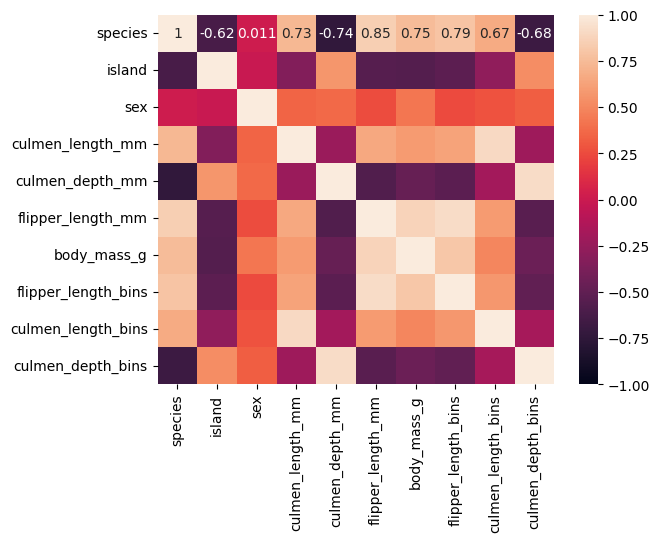

In [123]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

#### Crear nuevas variables

In [124]:
# body mass/ flipper length (g/mm): densidad del ala
df['body_mass_flipper_length_ratio'] = df['body_mass_g'] / df['flipper_length_mm']

In [125]:
print('min: ', df['body_mass_flipper_length_ratio'].min())
print('max: ',df['body_mass_flipper_length_ratio'].max())

min:  14.0625
max:  28.506787330316744


''

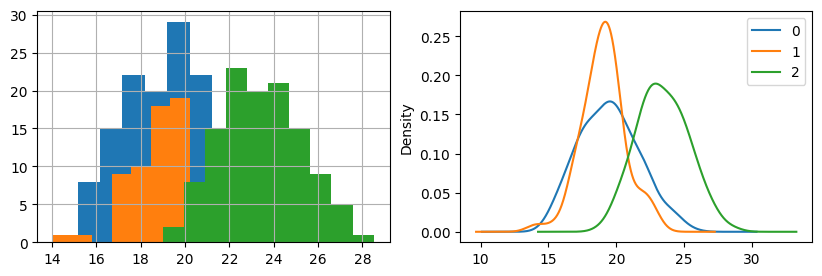

In [126]:
fig, ax =plt.subplots(1,2)

df.groupby("species").body_mass_flipper_length_ratio.plot(kind='kde', figsize=(10, 3), ax=ax[1])
df.groupby("species").body_mass_flipper_length_ratio.hist(figsize=(10, 3), ax=ax[0])

plt.legend()
;

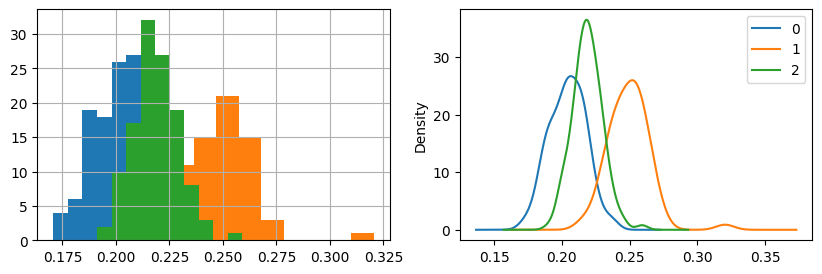

In [127]:
# body mass/ culem length (g/mm): densidad del pico
df['culem_length_flipper_length_ratio'] = df['culmen_length_mm'] / df['flipper_length_mm']

fig, ax =plt.subplots(1,2)

df.groupby("species").culem_length_flipper_length_ratio.plot(kind='kde', figsize=(10, 3), ax=ax[1])
df.groupby("species").culem_length_flipper_length_ratio.hist(figsize=(10, 3), ax=ax[0])

plt.legend()

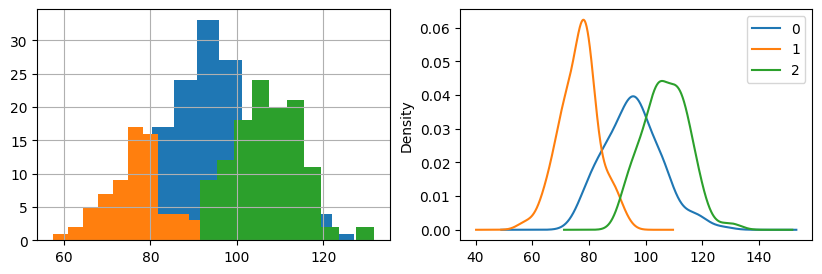

In [128]:
df['body_mass_culem_length_ratio'] = df['body_mass_g'] / df['culmen_length_mm']

fig, ax =plt.subplots(1,2)

df.groupby("species").body_mass_culem_length_ratio.plot(kind='kde', figsize=(10, 3), ax=ax[1])
df.groupby("species").body_mass_culem_length_ratio.hist(figsize=(10, 3), ax=ax[0])

plt.legend()

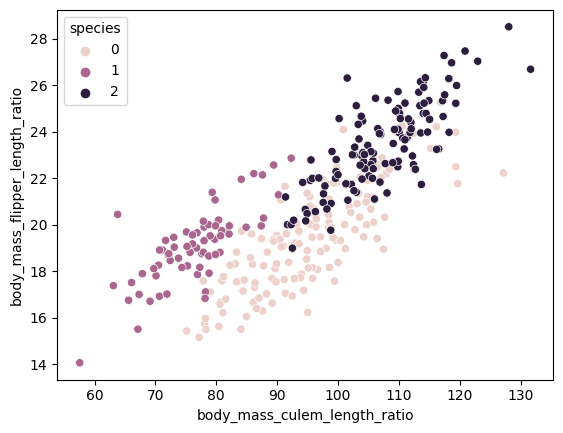

In [129]:
X = df[['body_mass_flipper_length_ratio', 'body_mass_culem_length_ratio', 'species']]

sns.scatterplot(x='body_mass_culem_length_ratio', y='body_mass_flipper_length_ratio', data=X, hue='species')

plt.show()

In [130]:
import plotly.express as px

X = df[['body_mass_flipper_length_ratio', 'body_mass_culem_length_ratio', 'culem_length_flipper_length_ratio', 'species']]
y = df.species

fig = px.scatter_3d(
    X, x="body_mass_flipper_length_ratio", y="body_mass_culem_length_ratio", z="culem_length_flipper_length_ratio", color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'body_mass_flipper_length_ratio': 'body mass/flipper len',
            'body_mass_culem_length_ratio': 'body mass/culem len',
            'culem_length_flipper_length_ratio': 'culem length/flipper len'}
)
fig.show()

## 5. Separación de datos (Data Splitting)
- Su proposito es:
1. Disponer de datos no usados en entrenamiento para evaluar el desempeño del modelo.
2. Evitar el *overfitting*/sobreajuste del modelo: el modelo no generaliza bien o esta extremadamente ajustado a los datos de entrenamiento.

- Necesario en cualquier modelo que realice predicciones sobretodo para Supervised Learning:
  - Clasificacion o Regresion

- Pero tambien puede usarse en Unsupervised Learning dependiendo del algoritmo usado:
  - Los que usen centroides para realizar predicciones (K-means)
  - Deteccion de anomalias/outliers (Datos normales: clase "1", outliers: clase"-1").
  - etc.

- División en diferentes grupos o subsets:
  - Entrenamiento (train):para entrenar al modelo de ML.
  - Validación (validation o val): para evaluar el desempeño o performance del modelo de ML durante el entrenamiento.
  - Test: para evaluar el desempeño del modelo entrenado.

In [131]:
df

species  island  sex  culmen_length_mm  culmen_depth_mm  \
0          0       2    1              39.1             18.7   
1          0       2    0              39.5             17.4   
2          0       2    0              40.3             18.0   
4          0       2    0              36.7             19.3   
5          0       2    1              39.3             20.6   
..       ...     ...  ...               ...              ...   
338        2       0    0              47.2             13.7   
340        2       0    0              46.8             14.3   
341        2       0    1              50.4             15.7   
342        2       0    0              45.2             14.8   
343        2       0    1              49.9             16.1   

     flipper_length_mm  body_mass_g  flipper_length_bins  culmen_length_bins  \
0                181.0       3750.0                    0                   0   
1                186.0       3800.0                    0                   0   
2                195.0       3250.0                    1                   0   
4                193.0       3450.0                    1                   0   
5                190.0       3650.0                    0                   0   
..                 ...          ...                  ...                 ...   
338              214.0       4925.0                    2                   1   
340              215.0       4850.0                    2                   1   
341              222.0       5750.0                    2                   1   
342              212.0       5200.0                    2                   1   
343              213.0       5400.0                    2                   1   

     culmen_depth_bins  body_mass_flipper_length_ratio  \
0                    1                       20.718232   
1                    1                       20.430108   
2                    1                       16.666667   
4                    2                       17.875648   
5                    2                       19.210526   
..                 ...                             ...   
338                  0                       23.014019   
340                  0                       22.558140   
341                  0                       25.900901   
342                  0                       24.528302   
343                  1                       25.352113   

     culem_length_flipper_length_ratio  body_mass_culem_length_ratio  
0                             0.216022                     95.907928  
1                             0.212366                     96.202532  
2                             0.206667                     80.645161  
4                             0.190155                     94.005450  
5                             0.206842                     92.875318  
..                                 ...                           ...  
338                           0.220561                    104.343220  
340                           0.217674                    103.632479  
341                           0.227027                    114.087302  
342                           0.213208                    115.044248  
343                           0.234272                    108.216433  

[333 rows x 13 columns]

<Axes: >

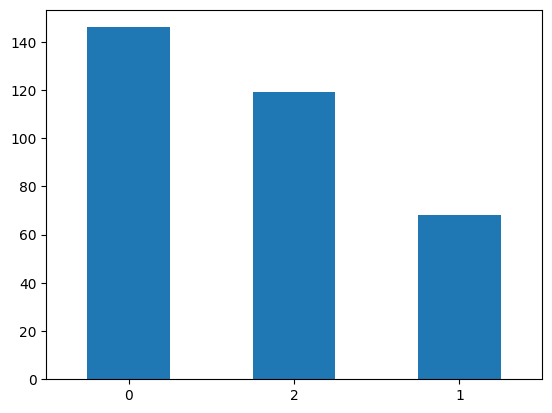

In [132]:
df.species.value_counts().plot(kind='bar', rot=0)

### Sampleo aleatorio: Ramdom sampling

In [133]:
from sklearn.model_selection import train_test_split

X, y = df.drop('species', axis=1), df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print('train: ', X_train.shape)
print('test: ', X_test.shape)

train:  (266, 12)
test:  (67, 12)


<Axes: >

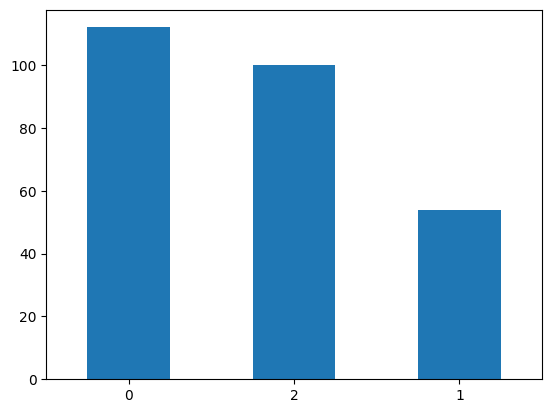

In [134]:
y_train.value_counts().plot(kind='bar', rot=0)

<Axes: >

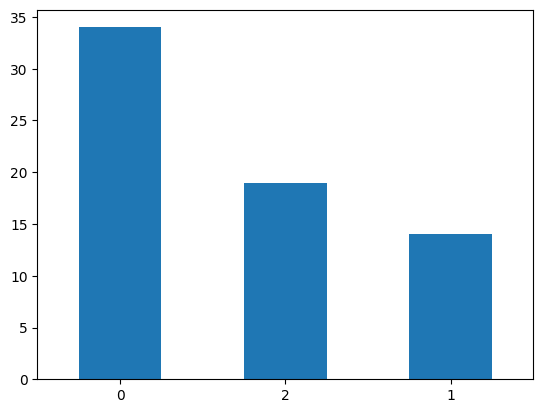

In [135]:
y_test.value_counts().plot(kind='bar', rot=0)

In [136]:
train_ratio = 0.8
val_ratio = 0.15
test_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_ratio, random_state=SEED)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + val_ratio), random_state=SEED)
    
print('train: ', X_train.shape)
print('val: ', X_val.shape)
print('test: ', X_test.shape)

train:  (266, 12)
val:  (27, 12)
test:  (40, 12)


<Axes: >

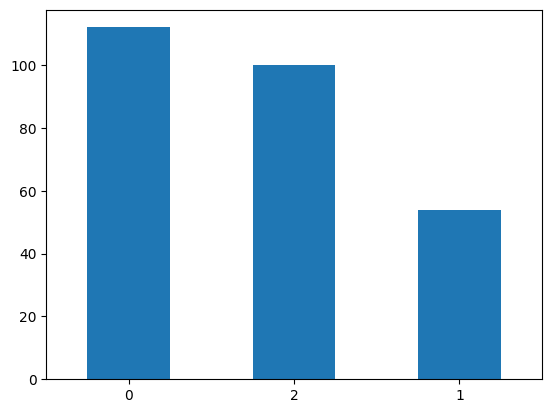

In [137]:
y_train.value_counts().plot(kind='bar', rot=0)

<Axes: >

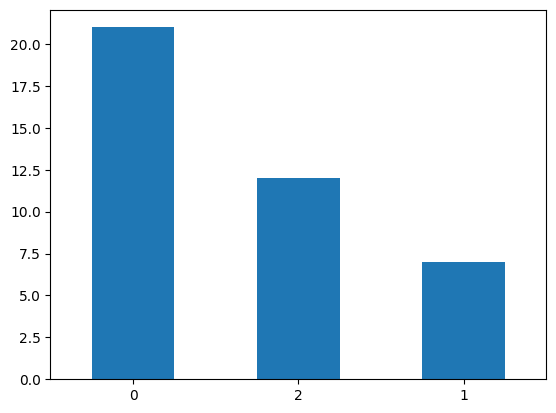

In [138]:
y_test.value_counts().plot(kind='bar', rot=0)

### Sampleo estratificado (Stratified sampling)
-  Separación basada en las etiquetas/clases/labels + división aleatoria

In [139]:
from sklearn.model_selection import train_test_split

X, y = df.drop('species', axis=1), df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

print('train: ', X_train.shape)
print('test: ', X_test.shape)

train:  (266, 12)
test:  (67, 12)


<Axes: >

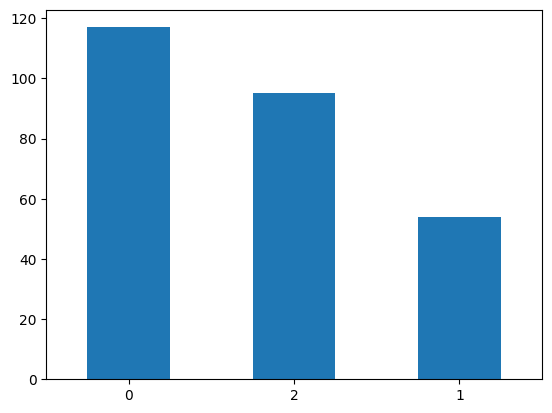

In [140]:
y_train.value_counts().plot(kind='bar', rot=0)

<Axes: >

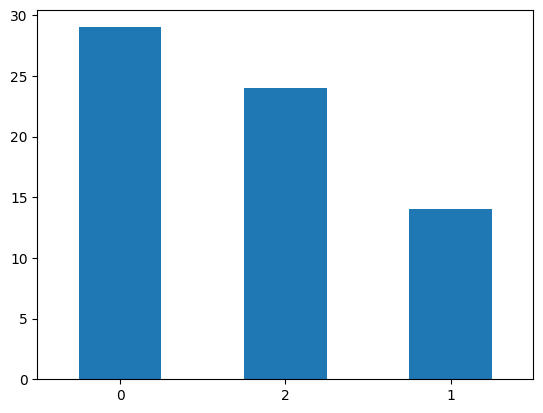

In [141]:
y_test.value_counts().plot(kind='bar', rot=0)

In [142]:
train_ratio = 0.8
val_ratio = 0.15
test_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_ratio, stratify=y, random_state=SEED)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + val_ratio), stratify=y_test, random_state=SEED)
    
print('train: ', X_train.shape)
print('val: ', X_val.shape)
print('test: ', X_test.shape)

train:  (266, 12)
val:  (27, 12)
test:  (40, 12)


<Axes: >

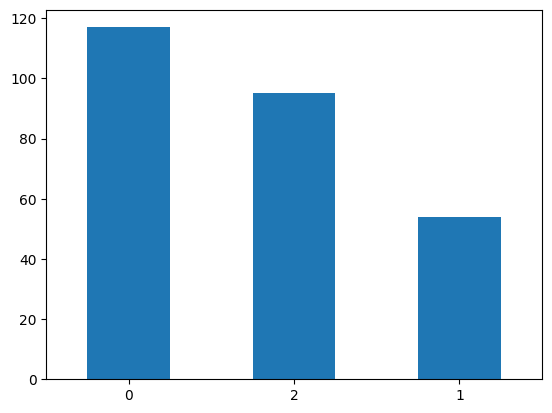

In [143]:
y_train.value_counts().plot(kind='bar', rot=0)

<Axes: >

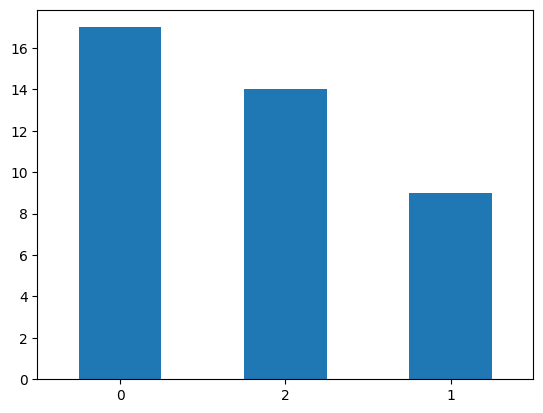

In [144]:
y_test.value_counts().plot(kind='bar', rot=0)

### *Time-based sampling
- Los datos son separados en función de diferentes rangos de fechas.
- Es crucial que datos del "pasado" aparezcan en el "futuro":
  - Las fechas del split train no pueden ser mayores que las del split val o test.
  - Las fechas del split val no pueden ser mayores que las del split test.
  - Las fechas del split test deben ser mayores que las de train y val.

In [145]:
df_avocado = pd.read_csv('avocado.csv')

In [146]:
df_avocado

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [147]:
df_avocado.sort_values(by='Date', ascending=True, inplace=True)

In [148]:
df_avocado

Unnamed: 0        Date  AveragePrice  Total Volume        4046  \
11569          51  2015-01-04          1.75      27365.89     9307.34   
9593           51  2015-01-04          1.49      17723.17     1189.35   
10009          51  2015-01-04          1.68       2896.72      161.68   
1819           51  2015-01-04          1.52      54956.80     3013.04   
9333           51  2015-01-04          1.64       1505.12        1.27   
...           ...         ...           ...           ...         ...   
8574            0  2018-03-25          1.36     908202.13   142681.06   
9018            0  2018-03-25          0.70    9010588.32  3999735.71   
18141           0  2018-03-25          1.42     163496.70    29253.30   
17673           0  2018-03-25          1.70     190257.38    29644.09   
8814            0  2018-03-25          1.34    1774776.77    63905.98   

            4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
11569    3844.81     615.28    13598.46    13061.10      537.36         0.00   
9593    15628.27       0.00      905.55      905.55        0.00         0.00   
10009     206.96       0.00     2528.08     2528.08        0.00         0.00   
1819    35456.88    1561.70    14925.18    11264.80     3660.38         0.00   
9333     1129.50       0.00      374.35      186.67      187.68         0.00   
...          ...        ...         ...         ...         ...          ...   
8574   463136.28  174975.75   127409.04   103579.41    22467.04      1362.59   
9018   966589.50   30130.82  4014132.29  3398569.92   546409.74     69152.63   
18141    5080.04       0.00   129163.36   109052.26    20111.10         0.00   
17673   70982.10       0.00    89631.19    89424.11      207.08         0.00   
8814   908653.71     843.45   801373.63   774634.09    23833.93      2905.61   

               type  year              region  
11569       organic  2015           Southeast  
9593        organic  2015             Chicago  
10009       organic  2015  HarrisburgScranton  
1819   conventional  2015          Pittsburgh  
9333        organic  2015               Boise  
...             ...   ...                 ...  
8574   conventional  2018             Chicago  
9018   conventional  2018        SouthCentral  
18141       organic  2018        SouthCentral  
17673       organic  2018          California  
8814   conventional  2018             NewYork  

[18249 rows x 14 columns]

In [149]:
train_frac = 0.8

train = df_avocado.iloc[0:int(df.shape[0]*train_frac), :]
test = df_avocado.iloc[int(df.shape[0]*train_frac):, :]

In [150]:
train

Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
11569          51  2015-01-04          1.75      27365.89    9307.34   
9593           51  2015-01-04          1.49      17723.17    1189.35   
10009          51  2015-01-04          1.68       2896.72     161.68   
1819           51  2015-01-04          1.52      54956.80    3013.04   
9333           51  2015-01-04          1.64       1505.12       1.27   
...           ...         ...           ...           ...        ...   
1349           49  2015-01-18          1.19    2330829.20  530333.83   
11930          48  2015-01-18          1.71       5508.20    1793.64   
1245           49  2015-01-18          1.06      85580.15    2250.10   
11255          49  2015-01-18          1.13      37233.34   15363.18   
11047          49  2015-01-18          1.24      51904.44   11894.56   

             4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
11569     3844.81     615.28    13598.46    13061.10      537.36         0.00   
9593     15628.27       0.00      905.55      905.55        0.00         0.00   
10009      206.96       0.00     2528.08     2528.08        0.00         0.00   
1819     35456.88    1561.70    14925.18    11264.80     3660.38         0.00   
9333      1129.50       0.00      374.35      186.67      187.68         0.00   
...           ...        ...         ...         ...         ...          ...   
1349   1045424.87  186027.52   569042.98   478770.70    90214.44        57.84   
11930     2078.72       0.00     1635.84     1620.00       15.84         0.00   
1245     63826.82     426.73    19076.50    10228.66     8804.67        43.17   
11255    20986.36       0.00      883.80      883.80        0.00         0.00   
11047    30078.32       4.70     9926.86      303.33     9623.53         0.00   

               type  year              region  
11569       organic  2015           Southeast  
9593        organic  2015             Chicago  
10009       organic  2015  HarrisburgScranton  
1819   conventional  2015          Pittsburgh  
9333        organic  2015               Boise  
...             ...   ...                 ...  
1349   conventional  2015            Midsouth  
11930       organic  2015    WestTexNewMexico  
1245   conventional  2015          Louisville  
11255       organic  2015          Sacramento  
11047       organic  2015            Portland  

[266 rows x 14 columns]

In [151]:
test

Unnamed: 0        Date  AveragePrice  Total Volume        4046  \
1765           49  2015-01-18          0.67    1088608.66   811662.62   
2753           49  2015-01-18          0.96    5475363.01  2431736.63   
361            49  2015-01-18          1.02    5570915.26  2780859.66   
1557           49  2015-01-18          1.32    3066789.62    91803.09   
11307          49  2015-01-18          1.29      14473.73    12300.47   
...           ...         ...           ...           ...         ...   
8574            0  2018-03-25          1.36     908202.13   142681.06   
9018            0  2018-03-25          0.70    9010588.32  3999735.71   
18141           0  2018-03-25          1.42     163496.70    29253.30   
17673           0  2018-03-25          1.70     190257.38    29644.09   
8814            0  2018-03-25          1.34    1774776.77    63905.98   

             4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
1765    200514.36    5643.07    70788.61    70788.61        0.00         0.00   
2753   2258069.63   76348.13   709208.62   527358.78   181809.88        39.96   
361    2108450.36  121614.31   559990.93   520299.26    36501.18      3190.49   
1557   2098784.32    7215.59   868986.62   784229.51    84757.11         0.00   
11307      580.15       0.00     1593.11     1593.11        0.00         0.00   
...           ...        ...         ...         ...         ...          ...   
8574    463136.28  174975.75   127409.04   103579.41    22467.04      1362.59   
9018    966589.50   30130.82  4014132.29  3398569.92   546409.74     69152.63   
18141     5080.04       0.00   129163.36   109052.26    20111.10         0.00   
17673    70982.10       0.00    89631.19    89424.11      207.08         0.00   
8814    908653.71     843.45   801373.63   774634.09    23833.93      2905.61   

               type  year         region  
1765   conventional  2015  PhoenixTucson  
2753   conventional  2015           West  
361    conventional  2015     California  
1557   conventional  2015      Northeast  
11307       organic  2015       SanDiego  
...             ...   ...            ...  
8574   conventional  2018        Chicago  
9018   conventional  2018   SouthCentral  
18141       organic  2018   SouthCentral  
17673       organic  2018     California  
8814   conventional  2018        NewYork  

[17983 rows x 14 columns]

In [152]:
train_frac = 0.8
val_frac = 0.15
test_frac = 0.1

train_row_limit = int(df.shape[0]*train_frac)
val_row_limit = train_row_limit + int(df.shape[0]*val_frac)

train = df_avocado.iloc[0:train_row_limit, :]
val = df_avocado.iloc[train_row_limit: val_row_limit, :]
test = df_avocado.iloc[val_row_limit:df.shape[0], :]

In [153]:
train.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
11569          51  2015-01-04          1.75      27365.89  9307.34   3844.81   
9593           51  2015-01-04          1.49      17723.17  1189.35  15628.27   
10009          51  2015-01-04          1.68       2896.72   161.68    206.96   
1819           51  2015-01-04          1.52      54956.80  3013.04  35456.88   
9333           51  2015-01-04          1.64       1505.12     1.27   1129.50   

          4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
11569   615.28    13598.46    13061.10      537.36          0.0       organic   
9593      0.00      905.55      905.55        0.00          0.0       organic   
10009     0.00     2528.08     2528.08        0.00          0.0       organic   
1819   1561.70    14925.18    11264.80     3660.38          0.0  conventional   
9333      0.00      374.35      186.67      187.68          0.0       organic   

       year              region  
11569  2015           Southeast  
9593   2015             Chicago  
10009  2015  HarrisburgScranton  
1819   2015          Pittsburgh  
9333   2015               Boise

In [154]:
train.tail()

Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
1349           49  2015-01-18          1.19    2330829.20  530333.83   
11930          48  2015-01-18          1.71       5508.20    1793.64   
1245           49  2015-01-18          1.06      85580.15    2250.10   
11255          49  2015-01-18          1.13      37233.34   15363.18   
11047          49  2015-01-18          1.24      51904.44   11894.56   

             4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
1349   1045424.87  186027.52   569042.98   478770.70    90214.44        57.84   
11930     2078.72       0.00     1635.84     1620.00       15.84         0.00   
1245     63826.82     426.73    19076.50    10228.66     8804.67        43.17   
11255    20986.36       0.00      883.80      883.80        0.00         0.00   
11047    30078.32       4.70     9926.86      303.33     9623.53         0.00   

               type  year            region  
1349   conventional  2015          Midsouth  
11930       organic  2015  WestTexNewMexico  
1245   conventional  2015        Louisville  
11255       organic  2015        Sacramento  
11047       organic  2015          Portland

In [155]:
val.head()

Unnamed: 0        Date  AveragePrice  Total Volume        4046  \
1765           49  2015-01-18          0.67    1088608.66   811662.62   
2753           49  2015-01-18          0.96    5475363.01  2431736.63   
361            49  2015-01-18          1.02    5570915.26  2780859.66   
1557           49  2015-01-18          1.32    3066789.62    91803.09   
11307          49  2015-01-18          1.29      14473.73    12300.47   

             4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
1765    200514.36    5643.07    70788.61    70788.61        0.00         0.00   
2753   2258069.63   76348.13   709208.62   527358.78   181809.88        39.96   
361    2108450.36  121614.31   559990.93   520299.26    36501.18      3190.49   
1557   2098784.32    7215.59   868986.62   784229.51    84757.11         0.00   
11307      580.15       0.00     1593.11     1593.11        0.00         0.00   

               type  year         region  
1765   conventional  2015  PhoenixTucson  
2753   conventional  2015           West  
361    conventional  2015     California  
1557   conventional  2015      Northeast  
11307       organic  2015       SanDiego

In [156]:
val.tail()

Unnamed: 0        Date  AveragePrice  Total Volume        4046  \
1037           49  2015-01-18          1.14     149319.82     2910.77   
10319          49  2015-01-18          1.29      43649.12    33738.87   
9331           49  2015-01-18          1.44       2973.94        8.83   
2337           49  2015-01-18          1.15     276205.95   160256.58   
2389           49  2015-01-18          0.79    5322625.57  2839359.92   

             4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
1037    103890.90    2048.78    40469.37    22405.47    17913.92       149.98   
10319     1368.91       0.00     8541.34     8541.34        0.00         0.00   
9331      2513.36       0.00      451.75      143.33      308.42         0.00   
2337     44019.64   14954.10    56975.63    35311.93    21663.70         0.00   
2389   1782045.18  146481.44   554739.03   497106.16    57607.18        25.69   

               type  year         region  
1037   conventional  2015   Indianapolis  
10319       organic  2015     LosAngeles  
9331        organic  2015          Boise  
2337   conventional  2015  SouthCarolina  
2389   conventional  2015   SouthCentral

In [157]:
test.head()

Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
725            49  2015-01-18          1.10     291788.43  113616.86   
1817           49  2015-01-18          1.47      59312.07    2147.08   
1869           49  2015-01-18          1.02    1674945.55  966515.75   
10423          49  2015-01-18          1.87       1459.37    1054.78   
2493           49  2015-01-18          1.18      69600.14   28457.99   

            4225      4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
725     45446.17  37740.18    94985.22    92319.38     1066.01      1599.83   
1817    36730.40   1075.26    19359.33    12321.55     7037.78         0.00   
1869   485150.34  14504.70   208774.76   206579.02     1074.30      1121.44   
10423      17.92      0.00      386.67      386.67        0.00         0.00   
2493    29719.57   2933.27     8489.31     7986.02      503.29         0.00   

               type  year             region  
725    conventional  2015            Detroit  
1817   conventional  2015         Pittsburgh  
1869   conventional  2015             Plains  
10423       organic  2015  MiamiFtLauderdale  
2493   conventional  2015            Spokane

### Validación cruzada (Cross-validation)
- Los datos son separados en múltiples subsets o folds.
- Algunos de estos folds se usan para entrenar el modelo mientras otros se usan para evaluar su desempeño.
- La ventaja principal de la validación cruzada es que podemos usar todos los datos disponibles.

#### Hold-out cross validation
- Sampleo aleatorio, dividiendo el dataset en entrenamiento, validación y test o en entrenamiento y test.


<img src="https://editor.analyticsvidhya.com/uploads/18265Screenshot-from-2020-10-06-16-35-50-768x432.png" width="800">
;

- K-fold cross-validation
  - El conjunto de datos se separa en k partes/folds del mismo tamaño.
  - Se realizan n iteraciones donde n es el número de folds
  - Con este acercamiento utilizamos todos los datos como test eventualmente
    - Disminuye la varianza
    - Generaliza mejor el modelo

<img src="https://user-images.githubusercontent.com/26833433/258589390-8d815058-ece8-48b9-a94e-0e1ab53ea0f6.png" width="800">
;

In [158]:
from sklearn.model_selection import KFold

X = df.drop('species', axis=1)
y = df.species
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
fold_count = 1

for train_index, test_index in cv.split(X, y):
    print(f'Fold:{fold_count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    fold_count += 1

Fold:1, Train set: 266, Test set:67
Fold:2, Train set: 266, Test set:67
Fold:3, Train set: 266, Test set:67
Fold:4, Train set: 267, Test set:66
Fold:5, Train set: 267, Test set:66


<Axes: title={'center': 'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

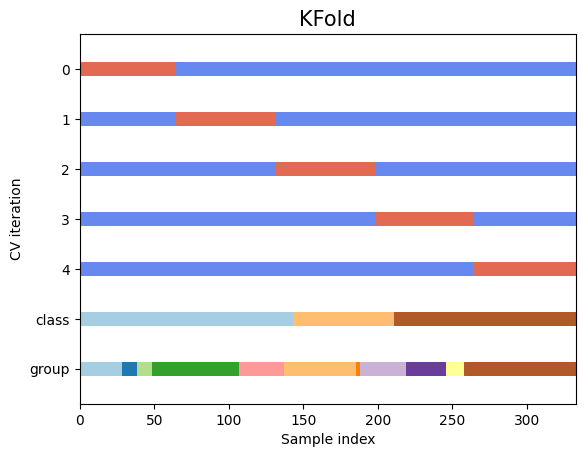

In [159]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, df.shape[0]],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


rng = np.random.RandomState(SEED)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

group_prior = rng.dirichlet([2] * df.shape[1])
groups = np.repeat(np.arange(df.shape[1]), rng.multinomial(df.shape[0], group_prior))  # Generate uneven groups

fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

In [160]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [161]:
from sklearn.model_selection import cross_val_score

help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv

[Mas ejemplos prácticos de entrenamiento de models con Cross Validation](https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation)

#### Leave-one-out cross-validation
- El modelo de ML es entrenado n veces donde n es el tamaño de observaciones en el dataset.
- En cada iteración, sólo una muestra/observación es usada como test y el resto se utiliza como entrenamiento.
- Utilizar el máximo número de observaciones posibles para el entrenamiento.

In [162]:
from sklearn.model_selection import LeaveOneOut

X = df.drop('species', axis=1)
y = df.species

cv = LeaveOneOut()

for i, (train_index, test_index) in enumerate(cv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241

  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243


<img src="https://www.researchgate.net/publication/344613547/figure/fig1/AS:1023136136978433@1620946072240/Schematic-representation-of-the-leave-one-out-cross-validation-LOOCV-method.ppm" width="800">
